# HIV-I reverse transcriptase

## Table of contents <a name="TOC"></a>
* [Setup](#setup)
* [Download dataset](#download)
* [Curate dataset](#curation)
* [Homogenize](#homogenize)


## Setup <a name="setup"></a>
| [TOC](#TOC) | [Setup](#setup) | [Download dataset](#download) | [Curate dataset](#curation) | [Homogenize](#homogenize) |

In [9]:
import numpy as np
from PDBClean import pdbclean_io, pdbutils, pdbclean_process

In [10]:
RUNDIR='./'
PROJDIR=RUNDIR+'HIVI-RT'
seqfile='../data/pdb_seqres.txt'

In [3]:
pdbclean_io.check_project(projdir=PROJDIR)

./HIVI-RT already exists, with content:
['info.txt', 'raw_bank', 'clean_bank', 'standard_MolID_bank', 'molid.list', 'fixHET_bank', 'standard_ChainID_bank', 'trash']


## Download dataset <a name="download"></a>
| [TOC](#TOC) | [Setup](#setup) | [Download dataset](#download) | [Curate dataset](#curation) | [Homogenize](#homogenize) | 

### Retrieve reference sequence from keyword
Define the `keyword` below and run the next cell to retrieve the potential hit list

In [5]:
keyword='HIV-1 reverse transcriptase'

In [6]:
ref_sequences, ref_metadata = pdbutils.retrieve_sequence_from_PDB(keyword, 
                                                                  mode='metadata', 
                                                                  update=False, 
                                                                  seqfile=seqfile)
print('{0} sequences were identified as potential hits! \n'.format(len(ref_sequences)))
for iseq in np.arange(len(ref_sequences)):
    print('{0} {1}'.format(ref_metadata[iseq], ref_sequences[iseq]))

39 sequences were identified as potential hits! 

>2rki_A mol:protein length:560  HIV-1 reverse transcriptase (RT) p66
 PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKEGKISKIGPENPYNTPVFAIKKKDSTKWRKLVDFRELNKRTQDFWEVQLGIPHPAGLKKKKSVTVLDVGDAYFSVPLDEDFRKYTAFTIPSINNETPGIRYQYNVLPQGWKGSPAIFQSSMTKILEPFRKQNPDIVIYQYMDDLYVGSDLEIGQHRTKIEELRQHLLRWGLTTPDKKHQKEPPFLWMGYELHPDKWTVQPIVLPEKDSWTVNDIQKLVGKLNWASQIYPGIKVRQLCKLLRGTKALTEVIPLTEEAELELAENREILKEPVHGVYYDPSKDLIAEIQKQGQGQWTYQIYQEPFKNLKTGKYARMRGAHTNDVKQLTEAVQKITTESIVIWGKTPKFKLPIQKETWETWWTEYWQATWIPEWEFVNTPPLVKLWYQLEKEPIVGAETFYVDGAANRETKLGKAGYVTNRGRQKVVTLTDTTNQKTELQAIYLALQDSGLEVNIVTDSQYALGIIQAQPDQSESELVNQIIEQLIKKEKVYLAWVPAHKGIGGNEQVDKLVSAGIRKVL

>2rki_B mol:protein length:440  HIV-1 reverse transcriptase (RT) p51
 PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKEGKISKIGPENPYNTPVFAIKKKDSTKWRKLVDFRELNKRTQDFWEVQLGIPHPAGLKKKKSVTVLDVGDAYFSVPLDEDFRKYTAFTIPSINNETPGIRYQYNVLPQGWKGSPAIFQSSMTKILEPFRKQNPDIVIYQYMDDLYVGSDLEIGQHRTKIEELRQHLLRWGLTTPDKKHQKEPPFLWMGYELHPDKWTVQPIVLPE

### Retrieve all sequences that match the reference sequence
(might take a while...)

In [7]:
sequences, metadata = pdbutils.retrieve_sequence_from_PDB(ref_sequences[0], 
                                                          mode='sequence', 
                                                          update=False, 
                                                          seqfile=seqfile)
for seq in ref_sequences[1:]:
    newseq, newmet = pdbutils.retrieve_sequence_from_PDB(seq, mode='sequence', update=False, seqfile=seqfile)
    sequences = np.append(sequences, newseq)
    metadata  = np.append(metadata, newmet)
print('{0} sequences were retrieved! \n'.format(len(sequences)))
for iseq in np.arange(len(sequences)):
    print('{0} {1}'.format(metadata[iseq], sequences[iseq]))

2482 sequences were retrieved! 

>1c0t_A mol:protein length:560  HIV-1 REVERSE TRANSCRIPTASE (A-CHAIN)
 PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKEGKISKIGPENPYNTPVFAIKKKDSTKWRKLVDFRELNKRTQDFWEVQLGIPHPAGLKKKKSVTVLDVGDAYFSVPLDEDFRKYTAFTIPSINNETPGIRYQYNVLPQGWKGSPAIFQSSMTKILEPFRKQNPDIVIYQYMDDLYVGSDLEIGQHRTKIEELRQHLLRWGLTTPDKKHQKEPPFLWMGYELHPDKWTVQPIVLPEKDSWTVNDIQKLVGKLNWASQIYPGIKVRQLCKLLRGTKALTEVIPLTEEAELELAENREILKEPVHGVYYDPSKDLIAEIQKQGQGQWTYQIYQEPFKNLKTGKYARMRGAHTNDVKQLTEAVQKITTESIVIWGKTPKFKLPIQKETWETWWTEYWQATWIPEWEFVNTPPLVKLWYQLEKEPIVGAETFYVDGAANRETKLGKAGYVTNRGRQKVVTLTDTTNQKTELQAIYLALQDSGLEVNIVTDSQYALGIIQAQPDQSESELVNQIIEQLIKKEKVYLAWVPAHKGIGGNEQVDKLVSAGIRKVL

>1c0u_A mol:protein length:560  HIV-1 REVERSE TRANSCRIPTASE (A-CHAIN)
 PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKEGKISKIGPENPYNTPVFAIKKKDSTKWRKLVDFRELNKRTQDFWEVQLGIPHPAGLKKKKSVTVLDVGDAYFSVPLDEDFRKYTAFTIPSINNETPGIRYQYNVLPQGWKGSPAIFQSSMTKILEPFRKQNPDIVIYQYMDDLYVGSDLEIGQHRTKIEELRQHLLRWGLTTPDKKHQKEPPFLWMGYELHPDKWTVQPIVLPEKDSWTVNDIQKLVGK


>3bgr_B mol:protein length:428  p51 RT
 PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKEGKISKIGPENPYNTPVFAIKKKDSTKWRKLVDFRELNKRTQDFWEVQLGIPHPAGLKKKKSVTVLDVGDAYFSVPLDEDFRKYTAFTIPSINNETPGIRYQYNVLPQGWKGSPAIFQSSMTKILEPFKKQNPDIVIYQYMDDLYVGSDLEIGQHRTKIEELRQHLLRWGLTTPDKKHQKEPPFLWMGYELHPDKWTVQPIVLPEKDSWTVNDIQKLVGKLNWASQIYPGIKVRQLSKLLRGTKALTEVIPLTEEAELELAENREILKEPVHGVYYDPSKDLIAEIQKQGQGQWTYQIYQEPFKNLKTGKYARMRGAHTNDVKQLTEAVQKITTESIVIWGKTPKFKLPIQKETWETWWTEYWQATWIPEWEFVNTPPLVKLWYQ

>3ig1_B mol:protein length:428  HIV-1 Reverse Transcriptase p51 subunit
 PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKEGKISKIGPENPYNTPVFAIKKKDSTKWRKLVDFRELNKRTQDFWEVQLGIPHPAGLKKKKSVTVLDVGDAYFSVPLDEDFRKYTAFTIPSINNETPGIRYQYNVLPQGWKGSPAIFQSSMTKILEPFKKQNPDIVIYQYMDDLYVGSDLEIGQHRTKIEELRQHLLRWGLTTPDKKHQKEPPFLWMGYELHPDKWTVQPIVLPEKDSWTVNDIQKLVGKLNWASQIYPGIKVRQLSKLLRGTKALTEVIPLTEEAELELAENREILKEPVHGVYYDPSKDLIAEIQKQGQGQWTYQIYQEPFKNLKTGKYARMRGAHTNDVKQLTEAVQKITTESIVIWGKTPKFKLPIQKETWETWWTEYWQATWIPEWEFVNTPPLVKLWYQ

>3irx_B mol:protein length

>1klm_B mol:protein length:440  HIV-1 REVERSE TRANSCRIPTASE
 PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKEGKISKIGPENPYNTPVFAIKKKDSTKWRKLVDFRELNKRTQDFWEVQLGIPHPAGLKKKKSVTVLDVGDAYFSVPLDEDFRKYTAFTIPSINNETPGIRYQYNVLPQGWKGSPAIFQSSMTKILEPFRKQNPDIVIYQYMDDLYVGSDLEIGQHRTKIEELRQHLLRWGLTTPDKKHQKEPPFLWMGYELHPDKWTVQPIVLPEKDSWTVNDIQKLVGKLNWASQIYPGIKVRQLCKLLRGTKALTEVIPLTEEAELELAENREILKEPVHGVYYDPSKDLIAEIQKQGQGQWTYQIYQEPFKNLKTGKYARMRGAHTNDVKQLTEAVQKITTESIVIWGKTPKFKLPIQKETWETWWTEYWQATWIPEWEFVNTPPLVKLWYQLEKEPIVGAETF

>1rev_B mol:protein length:440  HIV-1 REVERSE TRANSCRIPTASE
 PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKEGKISKIGPENPYNTPVFAIKKKDSTKWRKLVDFRELNKRTQDFWEVQLGIPHPAGLKKKKSVTVLDVGDAYFSVPLDEDFRKYTAFTIPSINNETPGIRYQYNVLPQGWKGSPAIFQSSMTKILEPFRKQNPDIVIYQYMDDLYVGSDLEIGQHRTKIEELRQHLLRWGLTTPDKKHQKEPPFLWMGYELHPDKWTVQPIVLPEKDSWTVNDIQKLVGKLNWASQIYPGIKVRQLCKLLRGTKALTEVIPLTEEAELELAENREILKEPVHGVYYDPSKDLIAEIQKQGQGQWTYQIYQEPFKNLKTGKYARMRGAHTNDVKQLTEAVQKITTESIVIWGKTPKFKLPIQKETWETWWTEYWQATWIPEWEFVNTPPLVKLWYQLEKEPIVG

### Download the corresponding PDB files
First we create the download directory if it does not exists already

In [8]:
pdbclean_io.check_project(projdir=PROJDIR, level='raw_bank')

In [9]:
pdbutils.download_pdb_from_metadata(metadata, projdir=PROJDIR)

wrote ./HIVI-RT/raw_bank/1c0t.cif from https://files.rcsb.org/download/1C0T.cif
wrote ./HIVI-RT/raw_bank/1c0u.cif from https://files.rcsb.org/download/1C0U.cif
wrote ./HIVI-RT/raw_bank/1c1b.cif from https://files.rcsb.org/download/1C1B.cif
wrote ./HIVI-RT/raw_bank/1c1c.cif from https://files.rcsb.org/download/1C1C.cif
wrote ./HIVI-RT/raw_bank/1dtq.cif from https://files.rcsb.org/download/1DTQ.cif
wrote ./HIVI-RT/raw_bank/1dtt.cif from https://files.rcsb.org/download/1DTT.cif
wrote ./HIVI-RT/raw_bank/1ep4.cif from https://files.rcsb.org/download/1EP4.cif
wrote ./HIVI-RT/raw_bank/1fk9.cif from https://files.rcsb.org/download/1FK9.cif
wrote ./HIVI-RT/raw_bank/1jlq.cif from https://files.rcsb.org/download/1JLQ.cif
wrote ./HIVI-RT/raw_bank/1klm.cif from https://files.rcsb.org/download/1KLM.cif
wrote ./HIVI-RT/raw_bank/1rev.cif from https://files.rcsb.org/download/1REV.cif
wrote ./HIVI-RT/raw_bank/1rt1.cif from https://files.rcsb.org/download/1RT1.cif
wrote ./HIVI-RT/raw_bank/1rt2.cif from h

wrote ./HIVI-RT/raw_bank/4rw6.cif from https://files.rcsb.org/download/4RW6.cif
wrote ./HIVI-RT/raw_bank/4rw7.cif from https://files.rcsb.org/download/4RW7.cif
wrote ./HIVI-RT/raw_bank/4rw8.cif from https://files.rcsb.org/download/4RW8.cif
wrote ./HIVI-RT/raw_bank/4rw9.cif from https://files.rcsb.org/download/4RW9.cif
wrote ./HIVI-RT/raw_bank/4we1.cif from https://files.rcsb.org/download/4WE1.cif
wrote ./HIVI-RT/raw_bank/5c25.cif from https://files.rcsb.org/download/5C25.cif
wrote ./HIVI-RT/raw_bank/5c42.cif from https://files.rcsb.org/download/5C42.cif
wrote ./HIVI-RT/raw_bank/5cym.cif from https://files.rcsb.org/download/5CYM.cif
wrote ./HIVI-RT/raw_bank/5cyq.cif from https://files.rcsb.org/download/5CYQ.cif
wrote ./HIVI-RT/raw_bank/5d3g.cif from https://files.rcsb.org/download/5D3G.cif
wrote ./HIVI-RT/raw_bank/5hbm.cif from https://files.rcsb.org/download/5HBM.cif
wrote ./HIVI-RT/raw_bank/5hlf.cif from https://files.rcsb.org/download/5HLF.cif
wrote ./HIVI-RT/raw_bank/5hp1.cif from h

### Clean up the files
First, create clean CIF files from raw CIF files and then simplify and split in biological assemblies

In [11]:
pdbclean_io.check_project(projdir=PROJDIR, level='clean_bank')
pdbclean_process.process(projdir=PROJDIR, step='clean', source='raw_bank', target='clean_bank')

[1/174]: ./HIVI-RT/clean_bank/1c0t.cif
[2/174]: ./HIVI-RT/clean_bank/1c0u.cif
[3/174]: ./HIVI-RT/clean_bank/1c1b.cif
[4/174]: ./HIVI-RT/clean_bank/1c1c.cif
[5/174]: ./HIVI-RT/clean_bank/1dtq.cif
[6/174]: ./HIVI-RT/clean_bank/1dtt.cif
[7/174]: ./HIVI-RT/clean_bank/1ep4.cif
[8/174]: ./HIVI-RT/clean_bank/1fk9.cif
[9/174]: ./HIVI-RT/clean_bank/1jlq.cif
[10/174]: ./HIVI-RT/clean_bank/1klm.cif
[11/174]: ./HIVI-RT/clean_bank/1rev.cif
[12/174]: ./HIVI-RT/clean_bank/1rt1.cif
[13/174]: ./HIVI-RT/clean_bank/1rt2.cif
[14/174]: ./HIVI-RT/clean_bank/1rt4.cif
[15/174]: ./HIVI-RT/clean_bank/1rt5.cif
[16/174]: ./HIVI-RT/clean_bank/1rt6.cif
[17/174]: ./HIVI-RT/clean_bank/1rt7.cif
[18/174]: ./HIVI-RT/clean_bank/1rtd.cif
[19/174]: ./HIVI-RT/clean_bank/1rth.cif
[20/174]: ./HIVI-RT/clean_bank/1rti.cif
[21/174]: ./HIVI-RT/clean_bank/1rtj.cif
[22/174]: ./HIVI-RT/clean_bank/1tkt.cif
[23/174]: ./HIVI-RT/clean_bank/1tkx.cif
[24/174]: ./HIVI-RT/clean_bank/1tkz.cif
[25/174]: ./HIVI-RT/clean_bank/1tl1.cif
[26/174]:

In [4]:
pdbclean_io.check_project(projdir=PROJDIR, level='simple_bank')
pdbclean_process.process(projdir=PROJDIR, step='simplify', source='clean_bank', target='simple_bank')

[1/174]: ./HIVI-RT/simple_bank/1c0t.cif
[2/174]: ./HIVI-RT/simple_bank/1c0u.cif
[3/174]: ./HIVI-RT/simple_bank/1c1b.cif
[4/174]: ./HIVI-RT/simple_bank/1c1c.cif
[5/174]: ./HIVI-RT/simple_bank/1dtq.cif
[6/174]: ./HIVI-RT/simple_bank/1dtt.cif
[7/174]: ./HIVI-RT/simple_bank/1ep4.cif
[8/174]: ./HIVI-RT/simple_bank/1fk9.cif
[9/174]: ./HIVI-RT/simple_bank/1jlq.cif
[10/174]: ./HIVI-RT/simple_bank/1klm.cif
[11/174]: ./HIVI-RT/simple_bank/1rev.cif
[12/174]: ./HIVI-RT/simple_bank/1rt1.cif
[13/174]: ./HIVI-RT/simple_bank/1rt2.cif
[14/174]: ./HIVI-RT/simple_bank/1rt4.cif
[15/174]: ./HIVI-RT/simple_bank/1rt5.cif
[16/174]: ./HIVI-RT/simple_bank/1rt6.cif
[17/174]: ./HIVI-RT/simple_bank/1rt7.cif
[18/174]: ./HIVI-RT/simple_bank/1rtd.cif
[19/174]: ./HIVI-RT/simple_bank/1rth.cif
[20/174]: ./HIVI-RT/simple_bank/1rti.cif
[21/174]: ./HIVI-RT/simple_bank/1rtj.cif
[22/174]: ./HIVI-RT/simple_bank/1tkt.cif
[23/174]: ./HIVI-RT/simple_bank/1tkx.cif
[24/174]: ./HIVI-RT/simple_bank/1tkz.cif
[25/174]: ./HIVI-RT/simpl

## Curation <a name="curation"></a>
| [TOC](#TOC) | [Setup](#setup) | [Download dataset](#download) | [Curate dataset](#curation) | [Homogenize](#homogenize) |

### standardize MolID

In [5]:
pdbclean_io.check_project(projdir=PROJDIR, level='standard_MolID_bank')

```
PDBClean MolID Conversion Build Menu
             Select one of the following options to proceed:
             1) Show full conversion
             2) Show only unassigned conversions
             3) Enter input file
             4) Search MolID to add chain ID conversion
             5) Go entry by entry to add chain ID conversion
             6) Remove a chain ID conversion
          
Option Number: 2
1:HIV-1 REVERSE TRANSCRIPTASE (A-CHAIN):
1:HIV-1 REVERSE TRANSCRIPTASE (B-CHAIN):
1:(R)-(+)9B-(3-METHYL)PHENYL-2,3-DIHYDROTHIAZOLO[2,3-A]ISOINDOL-5(9BH)-ONE:
4:WATER:
1:(R)-(+) 5(9BH)-OXO-9B-PHENYL-2,3-DIHYDROTHIAZOLO[2,3-A]ISOINDOL-3-CARBOXYLIC ACID METHYL ESTER:
1:6-(3,5-DIMETHYLBENZYL)-1-ETHOXYMETHYL-5-ISOPROPYLURACIL:
1:6-(CYCLOHEXYLSULFANYL)-1-(ETHOXYMETHYL)-5-(1-METHYLETHYL)PYRIMIDINE-2,4(1H,3H)-DIONE:
1:HIV-1 RT A-CHAIN:
1:HIV-1 RT B-CHAIN:
1:N-[[3-FLUORO-4-ETHOXY-PYRID-2-YL]ETHYL]-N-[5-NITRILOMETHYL-PYRIDYL]-THIOUREA:
1:N-[[3-FLUORO-4-ETHOXY-PYRID-2-YL]ETHYL]-N-[5-CHLORO-PYRIDYL]-THIOUREA:
2:HIV-1 REVERSE TRANSCRIPTASE:
1:5-(3,5-DICHLOROPHENYL)THIO-4-ISOPROPYL-1-(PYRIDIN-4-YL-METHYL)-1H-IMIDAZOL-2-YL-METHYL CARBAMATE:
1:HIV-1 RT, A-CHAIN:
1:HIV-1 RT, B-CHAIN:
1:(-)-6-CHLORO-4-CYCLOPROPYLETHYNYL-4-TRIFLUOROMETHYL-1,4-DIHYDRO-2H-3,1-BENZOXAZIN-2-ONE:
1:2-AMINO-6-(3,5-DIMETHYLPHENYL)SULFONYLBENZONITRILE:
1:(1-(5-METHANSULPHONAMIDO-1H-INDOL-2-YL-CARBONYL)4-[METHYLAMINO)PYRIDINYL]PIPERAZINE:
2:MAGNESIUM ION:
1:4-CHLORO-8-METHYL-7-(3-METHYL-BUT-2-ENYL)-6,7,8,9-TETRAHYDRO-2H-2,7,9A-TRIAZA-BENZO[CD]AZULENE-1-THIONE:
1:6-BENZYL-1-ETHOXYMETHYL-5-ISOPROPYL URACIL:
1:6-BENZYL-1-BENZYLOXYMETHYL-5-ISOPROPYL URACIL:
2:PHOSPHATE ION:
1:2-METHYL-FURAN-3-CARBOTHIOIC ACID [4-CHLORO-3-(3-METHYL-BUT-2-ENYLOXY)-PHENYL]-AMIDE:
1:N-[4-CLORO-3-(T-BUTYLOXOME)PHENYL-2-METHYL-3-FURAN-CARBOTHIAMIDE:
1:1-METHYL ETHYL 2-CHLORO-5-[[[(1-METHYLETHOXY)THIOOXO]METHYL]AMINO]-BENZOATE:
1:1-METHYL ETHYL 1-CHLORO-5-[[(5,6DIHYDRO-2-METHYL-1,4-OXATHIIN-3-YL)CARBONYL]AMINO]BENZOATE:
1:DNA TEMPLATE FOR REVERSE TRANSCRIPTASE:
1:DNA PRIMER FOR REVERSE TRANSCRIPTASE:
2:PROTEIN (REVERSE TRANSCRIPTASE):
1:THYMIDINE-5-TRIPHOSPHATE:
1:6,11-DIHYDRO-11-ETHYL-6-METHYL-9-NITRO-5H-PYRIDO[2,3-B][1,5]BENZODIAZEPIN-5-ONE:
1:1-(2-HYDROXYETHYLOXYMETHYL)-6-PHENYL THIOTHYMINE:
1:POL POLYPROTEINS [REVERSE TRANSCRIPTASE], CHAIN A:
1:POL POLYPROTEINS [REVERSE TRANSCRIPTASE], CHAIN B:
1:6-CHLORO-4-(CYCLOHEXYLOXY)-3-PROPYLQUINOLIN-2(1H)-ONE:
1:POL POLYPROTEIN, REVERSE TRANSCRIPTASE, CHAIN A:
1:POL POLYPROTEIN, REVERSE TRANSCRIPTASE, CHAIN B:
1:4-[(CYCLOPROPYLETHYNYL)OXY]-6-FLUORO-3-ISOPROPYLQUINOLIN-2(1H)-ONE:
1:6-CHLORO-4-(CYCLOHEXYLSULFANYL)-3-PROPYLQUINOLIN-2(1H)-ONE:
1:6-CHLORO-4-(CYCLOHEXYLSULFINYL)-3-PROPYLQUINOLIN-2(1H)-ONE:
1:6-CHLORO-4-(CYCLOHEXYLOXY)-3-ISOPROPYLQUINOLIN-2(1H)-ONE:
1:11-CYCLOPROPYL-5,11-DIHYDRO-4-METHYL-6H-DIPYRIDO[3,2-B2,3-E][1,4]DIAZEPIN-6-ONE:
1:ALPHA-(2,6-DICHLOROPHENYL)-ALPHA-(2-ACETYL-5-METHYLANILINO)ACETAMIDE:
2:REVERSE TRANSCRIPTASE/RIBONUCLEASE H (EC 2.7.7.49) (EC 2.7.7.7) (EC 3.1.26.4) (P66 RT):
1:5-BROMO-3-(PYRROLIDIN-1-YLSULFONYL)-1H-INDOLE-2-CARBOXAMIDE:
1:HIV-1 REVERSE TRANSCRIPTASE (RT) P66:
1:HIV-1 REVERSE TRANSCRIPTASE (RT) P51:
1:4-BENZYL-3-[(2-CHLOROBENZYL)SULFANYL]-5-THIOPHEN-2-YL-4H-1,2,4-TRIAZOLE:
3:GLYCEROL:
3:SULFATE ION:
2:CHLORIDE ION:
1:5-{[3,5-DIETHYL-1-(2-HYDROXYETHYL)-1H-PYRAZOL-4-YL]OXY}BENZENE-1,3-DICARBONITRILE:
2:REVERSE TRANSCRIPTASE/RIBONUCLEASE H:
1:2-[DIFLUORO-[(4-METHYL-PYRIMIDINYL)-THIO]METHYL]-BENZOXAZOLE:
1:CALCIUM ION:
1:P51 RT:
1:S,R MESO-TARTARIC ACID:
1:2-AZANYL-N-[[4-BROMANYL-3-(3-CHLORANYL-5-CYANO-PHENOXY)-2-FLUORANYL-PHENYL]METHYL]-4-CHLORANYL-1H-IMIDAZOLE-5-CARBOXAMIDE:
1:D(-)-TARTARIC ACID:
1:4-CHLORANYL-N-[[4-CHLORANYL-3-(3-CHLORANYL-5-CYANO-PHENOXY)-2-FLUORANYL-PHENYL]METHYL]-2-(HYDROXYMETHYL)-1H-IMIDAZOLE-5-CARBOXAMIDE:
1:4-CHLORANYL-N-[[4-CHLORANYL-3-(3-CHLORANYL-5-CYANO-PHENOXY)-2-FLUORANYL-PHENYL]METHYL]-1H-IMIDAZOLE-5-CARBOXAMIDE:
1:4-{[4-({4-[(E)-2-CYANOETHENYL]-2,6-DIMETHYLPHENYL}AMINO)PYRIMIDIN-2-YL]AMINO}BENZONITRILE:
3:1,2-ETHANEDIOL:
2:REVERSE TRANSCRIPTASE:
1:2-[3-CHLORO-5-(3-CHLORO-5-CYANOPHENOXY)PHENOXY]-N-(2-CHLORO-4-SULFAMOYLPHENYL)ACETAMIDE:
1:3-CHLORO-5-[2-CHLORO-5-(1H-INDAZOL-3-YLMETHOXY)PHENOXY]BENZONITRILE:
1:6-(4-CHLORO-2-FLUORO-3-PHENOXYBENZYL)PYRIDAZIN-3(2H)-ONE:
1:2-[4-CHLORO-2-(PHENYLCARBONYL)PHENOXY]-N-PHENYLACETAMIDE:
1:N-{4-[AMINO(DIHYDROXY)-LAMBDA~4~-SULFANYL]-2-METHYLPHENYL}-2-(4-CHLORO-2-{[3-FLUORO-5-(TRIFLUOROMETHYL)PHENYL]CARBONYL}PHENOXY)ACETAMIDE:
1:P66 RT:
1:N-({4-[({4-CHLORO-2-[(3-CHLORO-5-CYANOPHENYL)CARBONYL]PHENOXY}ACETYL)AMINO]-3-METHYLPHENYL}SULFONYL)PROPANAMIDE:
1:3-{5-[(6-AMINO-1H-PYRAZOLO[3,4-B]PYRIDIN-3-YL)METHOXY]-2-CHLOROPHENOXY}-5-CHLOROBENZONITRILE:
1:3-[6-BROMO-2-FLUORO-3-(1H-PYRAZOLO[3,4-C]PYRIDAZIN-3-YLMETHYL)PHENOXY]-5-CHLOROBENZONITRILE:
2:GAG-POL POLYPROTEIN:
1:3-[2-BROMO-4-(1H-PYRAZOLO[3,4-C]PYRIDAZIN-3-YLMETHYL)PHENOXY]-5-METHYLBENZONITRILE:
1:RT P51:
1:3-CHLORO-5-({6-[2-(3,4-DIHYDROISOQUINOLIN-2(1H)-YL)-2-OXOETHYL]-3-(DIMETHYLAMINO)-2-OXO-1,2-DIHYDROPYRIDIN-4-YL}OXY)BENZONITRILE:
1:S-{2-[(2-CHLORO-4-SULFAMOYLPHENYL)AMINO]-2-OXOETHYL} 6-METHYL-3,4-DIHYDROQUINOLINE-1(2H)-CARBOTHIOATE:
1:S-{2-[(2-CHLORO-4-SULFAMOYLPHENYL)AMINO]-2-OXOETHYL} 6,8-DICHLORO-3,4-DIHYDROQUINOLINE-1(2H)-CARBOTHIOATE:
1:HIV-1 REVERSE TRANSCRIPTASE P66 SUBUNIT:
2:HIV-1 REVERSE TRANSCRIPTASE P51 SUBUNIT:
1:2,7-DIHYDROXY-4-(PROPAN-2-YL)CYCLOHEPTA-2,4,6-TRIEN-1-ONE:
1:MANGANESE (II) ION:
1:(E)-S-METHYL 5-(1-(3,7-DIMETHYL-2-OXO-2,3-DIHYDROBENZO[D]OXAZOL-5-YL)-5-(5-METHYL-1,3,4-OXADIAZOL-2-YL)PENT-1-ENYL)-2-METHOXY-3-METHYLBENZOTHIOATE:
1:DIMETHYL 3,3-(6-METHOXY-6-OXOHEX-1-ENE-1,1-DIYL)BIS(5-CYANO-6-METHOXYBENZOATE):
1:REVERSE TRANSCRIPTASE P66 SUBUNIT:
1:REVERSE TRANSCRIPTASE P51 SUBUNIT:
1:5-D(*AP*CP*AP*GP*TP*CP*CP*CP*TP*GP*TP*TP*CP*GP*GP*GP*CP*GP*CP*CP*(DOC))-3:
1:5-D(*AP*TP*GP*GP*TP*GP*GP*GP*CP*GP*CP*CP*CP*GP*AP*AP*CP*AP*GP*GP*GP*AP*CP*TP*GP*TP*G)-3:
1:5-D(*AP*CP*A*GP*TP*CP*CP*CP*TP*GP*TP*TP*CP*GP*GP*GP*CP*GP*CP*CP*(DOC))-3:
1:5-D(*A*TP*GP*GP*TP*GP*GP*GP*CP*GP*CP*CP*CP*GP*AP*AP*CP*AP*GP*GP*GP*AP*CP*TP*GP*TP*G)-3:
1:[(2R,5R)-5-(6-AMINOPURIN-9-YL)-4-FLUORO-2,5-DIHYDROFURAN-2-YL]OXYMETHYL-[HYDROXY(PHOSPHONOOXY)PHOSPHORYL]OXY-PHOSPHINIC ACID:
1:2-DEOXYADENOSINE 5-TRIPHOSPHATE:
1:5-D(*AP*CP*AP*GP*TP*CP*CP*CP*TP*GP*TP*TP*CP*GP*GP*GP*CP*GP*CP*C*(URT))-3:
1:5-D(*AP*TP*GP*GP*TP*TP*GP*GP*CP*GP*CP*CP*CP*GP*AP*AP*CP*AP*GP*GP*GP*AP*CP*TP*GP*TP*G)-3:
1:DNA (5-D(*AP*T*GP*CP*AP*TP*GP*GP*CP*GP*CP*CP*CP*GP*AP*AP*CP*AP*GP*GP*GP*AP*CP*TP*GP*TP*G)-3):
1:DNA (5-D(*A*CP*AP*GP*TP*CP*CP*CP*TP*GP*TP*TP*CP*GP*GP*(MRG)P*CP*GP*CP*CP*(2DA))-3):
1:[[[[(2R,3S,4R,5R)-5-(6-AMINOPURIN-9-YL)-3,4-DIHYDROXY-OXOLAN-2-YL]METHOXY-HYDROXY-PHOSPHORYL]OXY-HYDROXY-PHOSPHORYL]OXY-HYDROXY-PHOSPHORYL] [(2S,3S,5R)-3-AZIDO-5-(5-METHYL-2,4-DIOXO-PYRIMIDIN-1-YL)OXOLAN-2-YL]METHYL HYDROGEN PHOSPHATE:
2:HIV REVERSE TRANSCRIPTASE:
1:3-({3-[(2-AMINO-6-FLUOROPYRIDIN-4-YL)METHYL]-5-(1-METHYLETHYL)-2,6-DIOXO-1,2,3,6-TETRAHYDROPYRIMIDIN-4-YL}CARBONYL)-5-METHYLBENZONITRILE:
1:3-{[3-ETHYL-5-(1-METHYLETHYL)-2,6-DIOXO-1,2,3,6-TETRAHYDROPYRIMIDIN-4-YL]CARBONYL}-5-METHYLBENZONITRILE:
1:3-METHYL-5-{[5-(1-METHYLETHYL)-2,6-DIOXO-3-PROPYL-1,2,3,6-TETRAHYDROPYRIMIDIN-4-YL]CARBONYL}BENZONITRILE:
1:3-{[3-BUTYL-5-(1-METHYLETHYL)-2,6-DIOXO-1,2,3,6-TETRAHYDROPYRIMIDIN-4-YL]CARBONYL}-5-METHYLBENZONITRILE:
1:4-({6-AMINO-5-BROMO-2-[(4-CYANOPHENYL)AMINO]PYRIMIDIN-4-YL}OXY)-3,5-DIMETHYLBENZONITRILE:
1:3,5-DIMETHYL-4-{[2-({1-[4-(METHYLSULFONYL)BENZYL]PIPERIDIN-4-YL}AMINO)PYRIMIDIN-4-YL]OXY}BENZONITRILE:
1:P66 REVERSE TRANSCRIPTASE:
1:P51 REVERSE TRANSCRIPTASE:
1:4-(4-{[4-(4-CYANO-2,6-DIMETHYLPHENOXY)PYRIMIDIN-2-YL]AMINO}PIPERIDIN-1-YL)BENZENESULFONAMIDE:
1:REVERSE HIV-1 REVERSE TRANSCRIPTASE P66:
1:P51:
1:5,6-DIHYDROXY-2-[(2-PHENYL-1H-INDOL-3-YL)METHYL]PYRIMIDINE-4-CARBOXYLIC ACID:
1:REVERSE TRANSCRIPTASE/ RIBONUCLEASE H:
1:1-[(5R,6R,8R,9R)-4-AMINO-9-{[TERT-BUTYL(DIMETHYL)SILYL]OXY}-6-({[TERT-BUTYL(DIMETHYL)SILYL]OXY}METHYL)-2,2-DIOXIDO-1,7-DIOXA-2-THIASPIRO[4.4]NON-3-EN-8-YL]-5-METHYLPYRIMIDINE-2,4(1H,3H)-DIONE:
1:1-(2,5-DICHLORO-3-{[5-CHLORO-1-(2H-PYRAZOLO[3,4-B]PYRIDIN-3-YLMETHYL)-1H-BENZOTRIAZOL-4-YL]OXY}PHENYL)METHANAMINE:
1:DNA (5-D(*AP*TP*GP*GP*AP*AP*GP*GP*CP*GP*CP*CP*CP*GP*AP*AP*CP*AP*GP*GP*GP*AP*CP*TP*GP*TP*G)-3):
1:DNA (5-D(*AP*CP*AP*GP*TP*CP*CP*CP*TP*GP*TP*TP*CP*GP*GP*(MRG)P*CP*GP*CP*CP*(ATM))-3):
1:3-AZIDO-3-DEOXYTHYMIDINE-5-TRIPHOSPHATE:
1:DNA (5-D(*A*CP*AP*GP*TP*CP*CP*CP*TP*GP*TP*TP*CP*GP*GP*(MRG)P*CP*GP*CP*CP*(ATM))-3):
1:REVERSE TRANSCRIPTASE/RIBONUCLEASE H, EXORIBONUCLEASE H, P66 RT:
1:REVERSE TRANSCRIPTASE/RIBONUCLEASE H, EXORIBONUCLEASE H, P51 RT:
1:(2E)-3-(3-CHLORO-5-{4-CHLORO-2-[2-(2,4-DIOXO-3,4-DIHYDROPYRIMIDIN-1(2H)-YL)ETHOXY]PHENOXY}PHENYL)PROP-2-ENENITRILE:
1:(2E)-3-(3-{2-[2-(2,4-DIOXO-3,4-DIHYDROPYRIMIDIN-1(2H)-YL)ETHOXY]-4-FLUOROPHENOXY}-5-FLUOROPHENYL)PROP-2-ENENITRILE:
1:(2E)-3-[4-({6-[(4-METHOXYPHENYL)AMINO]-7H-PURIN-2-YL}AMINO)-3,5-DIMETHYLPHENYL]PROP-2-ENENITRILE:
1:(2E)-3-(4-{[6-(1,3-BENZOTHIAZOL-5-YLAMINO)-9H-PURIN-2-YL]AMINO}-3,5-DIMETHYLPHENYL)PROP-2-ENENITRILE:
1:DIETHYL ({4-[2-(11-ETHYL-5-METHYL-6-OXO-6,11-DIHYDRO-5H-DIPYRIDO[3,2-B2,3-E][1,4]DIAZEPIN-8-YL)ETHYL]PHENOXY}METHYL)PHOSPHONATE:
2:DIMETHYL SULFOXIDE:
1:4-(4-METHYLPIPERAZIN-1-YL)BENZOIC ACID:
1:1-METHYL-5-PHENYL-1H-PYRAZOLE-4-CARBOXYLIC ACID:
1:N-(2-OXO-2,3-DIHYDRO-1H-BENZIMIDAZOL-5-YL)GLYCINAMIDE:
1:EXORIBONUCLEASE H, P66 RT:
2:[1-(4-FLUOROPHENYL)-5-METHYL-1H-PYRAZOL-4-YL]METHANOL:
1:1-[4-(TRIFLUOROMETHOXY)PHENYL]METHANAMINE:
1:2-({[2-(3,4-DIHYDROQUINOLIN-1(2H)-YL)-2-OXOETHYL](METHYL)AMINO}METHYL)QUINAZOLIN-4(1H)-ONE:
1:(5S)-6,6-DIMETHYL-5-[(6R)-8-OXO-6,8-DIHYDROFURO[3,4-E][1,3]BENZODIOXOL-6-YL]-5,6,7,8-TETRAHYDRO[1,3]DIOXOLO[4,5-G]ISOQUINOLIN-6-IUM:
1:REVERSE TRANSCRIPTASE/RIBONUCLEASE H, EXORIBONUCLEA P66 RT:
1:ETHYL PYRAZOLO[1,5-A]PYRIDINE-3-CARBOXYLATE:
1:HIV-1 REVERSE TRANSCRIPTASE, P66 SUBUNIT:
1:HIV-1 REVERSE TRANSCRIPTASE, P51 SUBUNIT:
1:4-({4-METHOXY-6-[2-(MORPHOLIN-4-YL)ETHOXY]-1,3,5-TRIAZIN-2-YL}AMINO)-2-(3-METHYLBUTOXY)BENZONITRILE:
1:4-[(4-METHOXYPYRIMIDIN-2-YL)AMINO]-2-[(3-METHYLBUT-2-EN-1-YL)OXY]BENZONITRILE:
1:HIV REVERSE TRANSCRIPTASE P66:
1:HIV REVERSE TRANSCRIPTASE P51:
1:MALONIC ACID:
1:11-ETHYL-5-METHYL-8-[2-(1-OXIDANYLQUINOLIN-4-YL)OXYETHYL]DIPYRIDO[3,2-[1,4]DIAZEPIN-6-ONE:
1:SUCROSE:
1:(2E)-3-(3-{4-CHLORO-2-[2-(2,4-DIOXO-3,4-DIHYDROPYRIMIDIN-1(2H)-YL)ETHOXY]PHENOXY}PHENYL)PROP-2-ENENITRILE:
1:(2E)-3-(3-BROMO-5-{4-CHLORO-2-[2-(2,4-DIOXO-3,4-DIHYDROPYRIMIDIN-1(2H)-YL)ETHOXY]PHENOXY}PHENYL)PROP-2-ENENITRILE:
1:8-{2-[2-(2,4-DIOXO-3,4-DIHYDROPYRIMIDIN-1(2H)-YL)ETHOXY]PHENOXY}INDOLIZINE-2-CARBONITRILE:
1:3-CHLORO-5-({1-[(4-METHYL-5-OXO-4,5-DIHYDRO-1H-1,2,4-TRIAZOL-3-YL)METHYL]-2-OXO-4-(TRIFLUOROMETHYL)-1,2-DIHYDROPYRIDIN-3-YL}OXY)BENZONITRILE:
1:4-({4-[3-(MORPHOLIN-4-YL)PROPOXY]-6-[(2,4,6-TRIMETHYLPHENYL)AMINO]-1,3,5-TRIAZIN-2-YL}AMINO)BENZONITRILE:
1:4-({4-[(2,4,6-TRIMETHYLPHENYL)AMINO]-1,3,5-TRIAZIN-2-YL}AMINO)BENZONITRILE:
1:5-R(*AP*UP*GP*GP*UP*CP*GP*GP*CP*GP*CP*CP*CP*GP*AP*AP*CP*AP*GP*GP*GP*AP*CP*UP*GP*UP*G)-3:
1:5-D(*AP*CP*AP*GP*TP*CP*CP*CP*TP*GP*TP*TP*CP*GP*GP*GP*CP*GP*CP*CP*G)-3:
1:5-R(P*AP*UP*GP*GP*UP*CP*GP*GP*CP*GP*CP*CP*CP*GP*AP*AP*CP*AP*GP*GP*GP*AP*CP*UP*GP*UP*G)-3:
1:5-D(*A*CP*AP*GP*TP*CP*CP*CP*TP*GP*TP*TP*CP*GP*GP*GP*CP*GP*CP*CP*G)-3:
1:5-R(*AP*UP*GP*GP*UP*CP*GP*GP*CP*GP*CP*CP*CP*GP*AP*AP*AP*CP*AP*GP*GP*GP*AP*CP*UP*GP*U)-3:
1:5-R(*AP*UP*GP*GP*UP*CP*GP*GP*CP*GP*CP*CP*CP*G)-3:
1:5-R(P*AP*CP*AP*GP*GP*GP*AP*CP*UP*GP*UP*G)-3:
1:5-D(*TP*GP*GP*AP*CP*GP*GP*CP*GP*CP*CP*CP*GP*AP*AP*CP*AP*GP*GP*GP*AP*CP*TP*G)-3:
1:5-D(*CP*AP*GP*TP*CP*CP*CP*TP*GP*TP*TP*CP*GP*GP*(MRG)P*CP*GP*CP*CP*G)-3:
1:[(1R)-2-METHOXY-1-{[(1S,3R)-3-(5-METHYL-2,4-DIOXO-3,4-DIHYDROPYRIMIDIN-1(2H)-YL)CYCLOPENTYL]OXY}-2-OXOETHYL]PHOSPHONIC ACID:
1:REVERSE TRANSCRIPTASE/RIBONUCLEASE H, P66 SUBUNIT:
1:REVERSE TRANSCRIPTASE/RIBONUCLEASE H, P51 SUBUNIT:
1:(2E)-3-(3-CHLORO-5-{2-[2-(2,4-DIOXO-3,4-DIHYDROPYRIMIDIN-1(2H)-YL)ETHOXY]PHENOXY}PHENYL)PROP-2-ENENITRILE:
1:5-{2-[2-(2,4-DIOXO-3,4-DIHYDROPYRIMIDIN-1(2H)-YL)ETHOXY]PHENOXY}NAPHTHALENE-2-CARBONITRILE:
1:6-({4-[(4-CYANOPHENYL)AMINO]-1,3,5-TRIAZIN-2-YL}AMINO)-5,7- DIMETHYL-2-NAPHTHONITRILE:
2:IODIDE ION:
2:4-IODOPYRAZOLE:
2:4-BROMO-1H-PYRAZOLE:
1:BROMIDE ION:
1:DNA APTAMER (38-MER):
1:(7,8-DIHYDROXY-2-OXO-2H-CHROMEN-4-YL)ACETIC ACID:
1:DNA (38-MER):
1:{[(1S,3R)-3-(5-METHYL-2,4-DIOXO-3,4-DIHYDROPYRIMIDIN-1(2H)-YL)CYCLOPENTYL]OXY}PROPANEDIOIC ACID:
1:PHOSPHONOFORMIC ACID:
1:3-AZIDO-3-DEOXYTHYMIDINE-5-MONOPHOSPHATE:
1:DNA (39-MER):
1:HIV-1 REVERSE TRANSCRIPTASE P66 DOMAIN:
1:HIV-1 REVERSE TRANSCRIPTASE P51 DOMAIN:
1:5-HYDROXY-4-OXO-1-[(4-SULFAMOYL[1,1-BIPHENYL]-4-YL)METHYL]-1,4-DIHYDROPYRIDINE-3-CARBOXYLIC ACID:
1:DNA (5-D(*AP*CP*AP*GP*TP*CP*CP*CP*TP*GP*TP*TP*CP*GP*GP*(MRG)P*CP*GP*CP*CP*G)-3):
1:DNA (27-MER):
1:2-DEOXY-4-ETHYNYL-2-FLUOROADENOSINE 5-(TETRAHYDROGEN TRIPHOSPHATE):
1:REVERSE TRANSCRIPTASE, P66 DOMAIN:
1:REVERSE TRANSCRIPTASE, P51 DOMAIN:
1:DNA 5-D(*AP*CP*AP*GP*TP*CP*CP*CP*TP*GP*TP*TP*CP*GP*GP*(MRG)P*CP*GP*CP*CP*G)-3:
1:DNA (5-D(*AP*CP*AP*GP*TP*CP*CP*CP*TP*GP*TP*TP*CP*GP*GP*(MRG)P*CP*GP*CP*CP*(6FM)P*(6FM))-3):
2:2-DEOXY-4-ETHYNYL-2-FLUOROADENOSINE 5-(DIHYDROGEN PHOSPHATE):
1:HIV-1 REVERSE TRANSCRIPTASE(ISOLATE HXB2):
1:HIV-1 REVERSE TRANSCRIPTASE (ISOLATE LW123):
1:4-{[4-(2,6-DIFLUORO-4-METHOXYBENZENE-1-CARBONYL)PYRIMIDIN-2-YL]AMINO}BENZONITRILE:
1:7-(2-(2-(2,4-DIOXO-3,4-DIHYDROPYRIMIDIN-1(2H)-YL)ETHOXY)PHENOXY)-2-NAPHTHONITRILE:
1:5-CHLORO-7-(2-(2-(2,4-DIOXO-3,4-DIHYDROPYRIMIDIN-1(2H)-YL)ETHOXY)PHENOXY)-8-METHYL-2-NAPHTHONITRILE:
1:1-[(BENZYLOXY)METHYL]-6-(CYCLOHEXYLMETHYL)-3-HYDROXY-5-(PROPAN-2-YL)PYRIMIDINE-2,4(1H,3H)-DIONE:
1:5-{2-[2-(2,4-DIOXO-3,4-DIHYDROPYRIMIDIN-1(2H)-YL)ETHOXY]-4-FLUOROPHENOXY}-7-FLUORONAPHTHALENE-2-CARBONITRILE:
1:DNA (5-D(*AP*TP*GP*GP*AP*AP*GP*GP*CP*GP*CP*CP*CP*GP*AP*AP*CP*AP*GP*GP*GP*AP* CP*TP*GP*TP*G)-3):
1:DNA (5-D(*AP*CP*AP*GP*TP*CP*CP*CP*TP*GP*TP*TP*CP*GP*GP*(MRG) P*CP*GP*CP*CP*GP)-3):
1:DNA (5-D(*TP*GP*GP*TP*CP*GP*GP*CP*GP*CP*CP*CP*GP*AP*AP*CP*AP*GP*GP*GP*AP*CP*TP*G)-3):
1:DNA (5-D(*CP*AP*GP*TP*CP*CP*CP*TP*GP*TP*TP*CP*GP*GP*(MRG)P*CP*GP*CP*CP*G)-3):
1:2,3-DIDEOXYADENOSINE TRIPHOSPHATE:
1:HIV-1 REVERSE TRANSCRIPTASE P61 SUBUNIT:
1:7-(FURAN-2-YL)-2-HYDROXYISOQUINOLINE-1,3(2H,4H)-DIONE:
1:N-(6-CYANO-3-{2-[2-(2,4-DIOXO-3,4-DIHYDROPYRIMIDIN-1(2H)-YL)ETHOXY]PHENOXY}-4-METHYLNAPHTHALEN-1-YL)-2-FLUORO-N-METHYLACETAMIDE:
1:N-(6-CYANO-3-{2-[2-(2,4-DIOXO-3,4-DIHYDROPYRIMIDIN-1(2H)-YL)ETHOXY]PHENOXY}-4-METHYLNAPHTHALEN-1-YL)-N-METHYLPROP-2-ENAMIDE:
1:N-(6-CYANO-3-{2-[2-(2,4-DIOXO-3,4-DIHYDROPYRIMIDIN-1(2H)-YL)ETHOXY]PHENOXY}-4-METHYLNAPHTHALEN-1-YL)PROP-2-ENAMIDE:
1:2-CHLORO-N-(6-CYANO-3-{2-[2-(2,4-DIOXO-3,4-DIHYDROPYRIMIDIN-1(2H)-YL)ETHOXY]PHENOXY}-4-METHYLNAPHTHALEN-1-YL)-N-METHYLACETAMIDE:
1:N-(6-CYANO-3-{2-[2-(2,4-DIOXO-3,4-DIHYDROPYRIMIDIN-1(2H)-YL)ETHOXY]PHENOXY}-4-METHYLNAPHTHALEN-1-YL)-N-METHYLPROPANAMIDE:
1:N-(6-CYANO-3-{2-[2-(2,4-DIOXO-3,4-DIHYDROPYRIMIDIN-1(2H)-YL)ETHOXY]PHENOXY}-4-METHYLNAPHTHALEN-1-YL)-N-METHYLACETAMIDE:
1:3-(PYRIMIDIN-2-YL)-N-[3-(5,6,7,8-TETRAHYDRONAPHTHALEN-2-YL)-1H-PYRAZOL-5-YL]PROPANAMIDE:
2:POL PROTEIN:
1:38-MER DNA APTAMER:
1:[[(1R,3S,5S)-3-(2-AZANYL-6-OXIDANYLIDENE-3H-PURIN-9-YL)-2-METHYLIDENE-5-OXIDANYL-CYCLOPENTYL]METHOXY-OXIDANYL-PHOSPHORYL] PHOSPHONO HYDROGEN PHOSPHATE:
1:2-DEOXYGUANOSINE-5-TRIPHOSPHATE:
1:DNA (5-D(*A*CP*AP*GP*TP*CP*CP*CP*TP*GP*TP*TP*CP*GP*GP*GP*CP*GP*CP*CP*(DDG))-3):
1:2,3-DEHYDRO-2,3-DEOXY-THYMIDINE 5-TRIPHOSPHATE:
1:DNA TEMPLATE (5- D(*AP*TP*GP*AP*AP*CP*GP*GP*CP*GP*CP*CP*CP*GP*AP*AP*CP*AP*GP*GP*GP*AP*CP*TP*GP*TP*G)-3):
1:DNA PRIMER (5- D(*AP*CP*AP*GP*TP*CP*CP*CP*TP*GP*TP*TP*CP*GP*GP*GP*CP*GP*CP*CP*GP)-3):
1:6-BENZYL-3-HYDROXYTHIENO[2,3-D]PYRIMIDINE-2,4(1H,3H)-DIONE:
2:TRIETHYLENE GLYCOL:
1:38-MER RNA-DNA APTAMER:
1:4-[(4-{[4-(4-CYANO-2,6-DIMETHYLPHENOXY)THIENO[3,2-D]PYRIMIDIN-2-YL]AMINO}PIPERIDIN-1-YL)METHYL]BENZENE-1-SULFONAMIDE:
1:SODIUM ION:
1:4-({4-[(4-{4-[(E)-2-CYANOETHENYL]-2,6-DIMETHYLPHENOXY}THIENO[3,2-D]PYRIMIDIN-2-YL)AMINO]PIPERIDIN-1-YL}METHYL)BENZENE-1-SULFONAMIDE:
1:METHYL 4-AZANYL-1-OXIDANYL-2-OXIDANYLIDENE-1,8-NAPHTHYRIDINE-3-CARBOXYLATE:
1:RNA (5-R(P*AP*GP*UP*GP*GP*CP*GP*GP*CP*CP*GP*AP*AP*CP*AP*GP*GP*GP*AP*C)-3):
1:RNA (5-R(P*UP*CP*CP*CP*UP*GP*UP*UP*CP*GP*GP*CP*CP*GP*CP*CP*A)-3):
1:DNA/RNA (38-MER):
1:HIV-1 RT P66 SUBUNIT:
1:HIV-1 RT P51 SUBUNIT:
1:5-{2-[2-(2,4-DIOXO-3,4-DIHYDROPYRIMIDIN-1(2H)-YL)ETHOXY]PHENOXY}-7-FLUORONAPHTHALENE-2-CARBONITRILE:
```

After manually editing a `molid.list` file with the following nomenclature:
- chain A: P66
- chain B: P51
- chain C: DNA-RNA primer and template
- chain W: water
- chain X: ions
- chain Z: ligands

we run the following script

```bash
cd examples/HIVI-RT
python ../../scripts/PDBClean_MolID_CIF.py simple_bank/ standard_MolID_bank/
[...]
Reading: simple_bank/6ika+01.cif  (221 of 223)
Reading: simple_bank/6ika+02.cif  (222 of 223)
Reading: simple_bank/6oe3+00.cif  (223 of 223)
PDBClean MolID Conversion Build Menu
Select one of the following options to proceed:
  1) Show full conversion
  2) Show only unassigned conversions
  3) Enter input file
  4) Search MolID to add chain ID conversion
  5) Go entry by entry to add chain ID conversion
  6) Remove a chain ID conversion
Option Number: 3
Conversion File: molid.list
Congratulations! You have successfully constructed your
conversion templates. You can proceed to the next section
by selection option 7 or, continue to edit your conversion 
template through this menu
PDBClean MolID Conversion Build Menu
Select one of the following options to proceed:
  1) Show full conversion
  2) Show only unassigned conversions
  3) Enter input file
  4) Search MolID to add chain ID conversion
  5) Go entry by entry to add chain ID conversion
  6) Remove a chain ID conversion
  7) Continue to next step of curation
Option Number: 7
PDBClean Concatenations Menu
Note: All proposed concatenations must be accepted before the curation can be completed.
Select one of the following options to proceed:
  1) Show all conversions
  2) Show only unaccepted concatenations
  3) Search and modify destination chainIDs of proposed concatenations
  4) Search and modify order of proposed concatenations
  5) Search and accept proposed concatenations
  6) Accept all proposed concatenations
Option Number: 6
Congratulations! You have successfully constructed your
conversion templates.You can proceed to the next section
by selection option 7 or, continue to edit your conversion
template through this menu
PDBClean Concatenations Menu
Note: All proposed concatenations must be accepted before the curation can be completed.
Select one of the following options to proceed:
  1) Show all conversions
  2) Show only unaccepted concatenations
  3) Search and modify destination chainIDs of proposed concatenations
  4) Search and modify order of proposed concatenations
  5) Search and accept proposed concatenations
  6) Accept all proposed concatenations
  7) Finalize Curation
Option Number: 7
Finalizing Curation ...```

an extra step is carried out now to fix the `HETATM` lines in the `.cif` files

In [7]:
pdbclean_io.check_project(projdir=PROJDIR, level='fixHET_bank')

./HIVI-RT/fixHET_bank already exists, with content:
['info.txt']


In [8]:
pdbclean_process.process(projdir=PROJDIR, step='fixhet', source='standard_MolID_bank', target='fixHET_bank')

[1/214]: ./HIVI-RT/fixHET_bank/1c0t+00.cif
[2/214]: ./HIVI-RT/fixHET_bank/1c0u+00.cif
[3/214]: ./HIVI-RT/fixHET_bank/1c1b+00.cif
[4/214]: ./HIVI-RT/fixHET_bank/1c1c+00.cif
[5/214]: ./HIVI-RT/fixHET_bank/1dtq+00.cif
[6/214]: ./HIVI-RT/fixHET_bank/1dtt+00.cif
[7/214]: ./HIVI-RT/fixHET_bank/1ep4+00.cif
[8/214]: ./HIVI-RT/fixHET_bank/1fk9+00.cif
[9/214]: ./HIVI-RT/fixHET_bank/1jlq+00.cif
[10/214]: ./HIVI-RT/fixHET_bank/1klm+00.cif
[11/214]: ./HIVI-RT/fixHET_bank/1rev+00.cif
[12/214]: ./HIVI-RT/fixHET_bank/1rt1+00.cif
[13/214]: ./HIVI-RT/fixHET_bank/1rt2+00.cif
[14/214]: ./HIVI-RT/fixHET_bank/1rt4+00.cif
[15/214]: ./HIVI-RT/fixHET_bank/1rt5+00.cif
[16/214]: ./HIVI-RT/fixHET_bank/1rt6+00.cif
[17/214]: ./HIVI-RT/fixHET_bank/1rt7+00.cif
[18/214]: ./HIVI-RT/fixHET_bank/1rtd+01.cif
[19/214]: ./HIVI-RT/fixHET_bank/1rtd+02.cif
[20/214]: ./HIVI-RT/fixHET_bank/1rth+00.cif
[21/214]: ./HIVI-RT/fixHET_bank/1rti+00.cif
[22/214]: ./HIVI-RT/fixHET_bank/1rtj+00.cif
[23/214]: ./HIVI-RT/fixHET_bank/1tkt+00.c

[187/214]: ./HIVI-RT/fixHET_bank/6aoc+02.cif
[188/214]: ./HIVI-RT/fixHET_bank/6asw+01.cif
[189/214]: ./HIVI-RT/fixHET_bank/6asw+02.cif
[190/214]: ./HIVI-RT/fixHET_bank/6avm+01.cif
[191/214]: ./HIVI-RT/fixHET_bank/6avm+02.cif
[192/214]: ./HIVI-RT/fixHET_bank/6avt+01.cif
[193/214]: ./HIVI-RT/fixHET_bank/6avt+02.cif
[194/214]: ./HIVI-RT/fixHET_bank/6bhj+01.cif
[195/214]: ./HIVI-RT/fixHET_bank/6bhj+02.cif
[196/214]: ./HIVI-RT/fixHET_bank/6c0j+00.cif
[197/214]: ./HIVI-RT/fixHET_bank/6c0k+00.cif
[198/214]: ./HIVI-RT/fixHET_bank/6c0l+00.cif
[199/214]: ./HIVI-RT/fixHET_bank/6c0n+00.cif
[200/214]: ./HIVI-RT/fixHET_bank/6c0o+00.cif
[201/214]: ./HIVI-RT/fixHET_bank/6c0p+00.cif
[202/214]: ./HIVI-RT/fixHET_bank/6c0r+00.cif
[203/214]: ./HIVI-RT/fixHET_bank/6cgf+00.cif
[204/214]: ./HIVI-RT/fixHET_bank/6duf+00.cif
[205/214]: ./HIVI-RT/fixHET_bank/6dug+00.cif
[206/214]: ./HIVI-RT/fixHET_bank/6duh+00.cif
[207/214]: ./HIVI-RT/fixHET_bank/6eli+00.cif
[208/214]: ./HIVI-RT/fixHET_bank/6hak+01.cif
[209/214]:

### standardize ChainID

In [9]:
pdbclean_io.check_project(projdir=PROJDIR, action='create', level='standard_ChainID_bank')

```bash
[fpoitevi@langev2 HIVI-RT]$ python ../../scripts/PDBClean_ChainStandardization_CIF.py standard_MolID_bank/ standard_ChainID_bank/
Reading: standard_MolID_bank/1c0t+00.cif  (1 of 214)
Reading: standard_MolID_bank/1c0u+00.cif  (2 of 214)
Reading: standard_MolID_bank/1c1b+00.cif  (3 of 214)
Reading: standard_MolID_bank/1c1c+00.cif  (4 of 214)
Reading: standard_MolID_bank/1dtq+00.cif  (5 of 214)
Reading: standard_MolID_bank/1dtt+00.cif  (6 of 214)
...
PDBClean ChainID Standardization Menu
    Select one of the following options to proceed:
    1) Select Standard Sequences from input structure
    2) Create Standard Sequences from consensus of input structures
Option Number: 2
    Create Standard Sequences from consensus of input structures.
    Type QUIT to return to the main menu.
    1) Show list of chain IDs for Standard Sequences
    2) Enter chain IDs to remove from list
    3) Input file with list of chain IDs to remove
    4) Create Standard Sequences from consensus of input structures
Option Number: 1
A
B
C
    Create Standard Sequences from consensus of input structures.
    Type QUIT to return to the main menu.
    1) Show list of chain IDs for Standard Sequences
    2) Enter chain IDs to remove from list
    3) Input file with list of chain IDs to remove
    4) Create Standard Sequences from consensus of input structures
Option Number: 4
PDBClean ChainID Standardization Menu
    Select one of the following options to proceed:
    1) Select Standard Sequences from input structure
    2) Create Standard Sequences from consensus of input structures
    3) Inspect/Edit Standard Sequences
    4) Perform pairwise alignments against Standard Sequences
Option Number: 3
    Review Standard Sequences. Type QUIT to return to the main menu.
    1) Show list of chain IDs in Standard Sequences
    2) Enter chain ID of Standard Sequence to inspect/edit
    3) Enter chain ID and inspect consensus of all matching chains
Option Number: 1
A
B
C
    Review Standard Sequences. Type QUIT to return to the main menu.
    1) Show list of chain IDs in Standard Sequences
    2) Enter chain ID of Standard Sequence to inspect/edit
    3) Enter chain ID and inspect consensus of all matching chains
Option Number: QUIT
PDBClean ChainID Standardization Menu
    Select one of the following options to proceed:
    1) Select Standard Sequences from input structure
    2) Create Standard Sequences from consensus of input structures
    3) Inspect/Edit Standard Sequences
    4) Perform pairwise alignments against Standard Sequences
Option Number: 4
    Perform pairwise alignments against Standard Sequences. Type QUIT to return to the main menu.
    1) Show list of structure chain IDs to ignore when pairwise aligning to the Standard Sequences
    2) Enter chain IDs to add to ignore list
    3) Input file with list of chain IDs to add to ignore list
    4) Perform pairwise alignments against Standard Sequences and create conversion template
Option Number: 1
    Perform pairwise alignments against Standard Sequences. Type QUIT to return to the main menu.
    1) Show list of structure chain IDs to ignore when pairwise aligning to the Standard Sequences
    2) Enter chain IDs to add to ignore list
    3) Input file with list of chain IDs to add to ignore list
    4) Perform pairwise alignments against Standard Sequences and create conversion template
Option Number: 4

MUSCLE v3.8.31 by Robert C. Edgar

http://www.drive5.com/muscle
This software is donated to the public domain.
Please cite: Edgar, R.C. Nucleic Acids Res 32(5), 1792-97.

Seq 2 seqs, max length 968, avg  length 729
00:00:00      1 MB(0%)  Iter   1  100.00%  K-mer dist pass 1
00:00:00      1 MB(0%)  Iter   1  100.00%  K-mer dist pass 2
00:00:00      4 MB(0%)  Iter   1  100.00%  Align node       
00:00:00      4 MB(0%)  Iter   1  100.00%  Root alignment
...
PDBClean ChainID Standardization Menu
    Select one of the following options to proceed:
    1) Select Standard Sequences from input structure
    2) Create Standard Sequences from consensus of input structures
    3) Inspect/Edit Standard Sequences
    4) Perform pairwise alignments against Standard Sequences
    5) Inspect/Edit chain ID reassignments
    6) Perform Standardization of Chain IDs
Option Number: 5
PDBClean ChainID Standardization Menu
    Select one of the following options to proceed:
    1) Select Standard Sequences from input structure
    2) Create Standard Sequences from consensus of input structures
    3) Inspect/Edit Standard Sequences
    4) Perform pairwise alignments against Standard Sequences
    5) Inspect/Edit chain ID reassignments
    6) Perform Standardization of Chain IDs
Option Number: 6
standard_MolID_bank/1c0t+00.cif
A A 0.5
B B 0.8983050847457628
standard_MolID_bank/1c0u+00.cif
A A 0.5495867768595041
B B 0.9411764705882353
standard_MolID_bank/1c1b+00.cif
A A 0.5475206611570248
B B 0.9619952494061758
...
Done!

[fpoitevi@langev2 HIVI-RT]$ cat standard_ChainID_bank/ChainStandardizationRecord.txt 
standard_MolID_bank/1c0t+00.cif:A:A:0.5
standard_MolID_bank/1c0t+00.cif:B:B:0.8983050847457628
standard_MolID_bank/1c0u+00.cif:A:A:0.5495867768595041
standard_MolID_bank/1c0u+00.cif:B:B:0.9411764705882353
standard_MolID_bank/1c1b+00.cif:A:A:0.5475206611570248
standard_MolID_bank/1c1b+00.cif:B:B:0.9619952494061758
standard_MolID_bank/1c1c+00.cif:A:A:0.5475206611570248
standard_MolID_bank/1c1c+00.cif:B:B:0.9458823529411765
standard_MolID_bank/1dtq+00.cif:A:A:0.5351239669421488
standard_MolID_bank/1dtq+00.cif:B:B:0.9685230024213075
standard_MolID_bank/1dtt+00.cif:A:A:0.5516528925619835
standard_MolID_bank/1dtt+00.cif:B:B:0.973621103117506
standard_MolID_bank/1ep4+00.cif:A:A:0.5330578512396694
standard_MolID_bank/1ep4+00.cif:B:B:0.9515738498789347
standard_MolID_bank/1fk9+00.cif:A:A:0.5299586776859504
standard_MolID_bank/1fk9+00.cif:B:B:0.9567307692307693
standard_MolID_bank/1jlq+00.cif:A:A:0.5444214876033058
standard_MolID_bank/1jlq+00.cif:B:B:0.9710144927536232
standard_MolID_bank/1klm+00.cif:A:A:0.5485537190082644
standard_MolID_bank/1klm+00.cif:B:B:0.9521531100478469
standard_MolID_bank/1rev+00.cif:A:A:0.5351239669421488
standard_MolID_bank/1rev+00.cif:B:B:0.9879227053140096
standard_MolID_bank/1rt1+00.cif:A:A:0.5495867768595041
standard_MolID_bank/1rt1+00.cif:B:B:0.9435294117647058
standard_MolID_bank/1rt2+00.cif:A:A:0.5537190082644629
standard_MolID_bank/1rt2+00.cif:B:B:0.9496402877697842
standard_MolID_bank/1rt4+00.cif:A:A:0.5475206611570248
standard_MolID_bank/1rt4+00.cif:B:B:0.9497607655502392
standard_MolID_bank/1rt5+00.cif:A:A:0.5475206611570248
standard_MolID_bank/1rt5+00.cif:B:B:0.9592326139088729
standard_MolID_bank/1rt6+00.cif:A:A:0.5495867768595041
standard_MolID_bank/1rt6+00.cif:B:B:0.9411764705882353
standard_MolID_bank/1rt7+00.cif:A:A:0.5464876033057852
standard_MolID_bank/1rt7+00.cif:B:B:0.9435294117647058
standard_MolID_bank/1rtd+01.cif:A:A:0.5640495867768595
standard_MolID_bank/1rtd+01.cif:B:B:0.9927536231884058
standard_MolID_bank/1rtd+02.cif:A:A:0.5640495867768595
standard_MolID_bank/1rtd+02.cif:B:B:0.9927536231884058
standard_MolID_bank/1rth+00.cif:A:A:0.5537190082644629
standard_MolID_bank/1rth+00.cif:B:B:0.9645390070921985
standard_MolID_bank/1rti+00.cif:A:A:0.5537190082644629
standard_MolID_bank/1rti+00.cif:B:B:0.95260663507109
standard_MolID_bank/1rtj+00.cif:A:A:0.5537190082644629
standard_MolID_bank/1rtj+00.cif:B:B:0.9647887323943662
standard_MolID_bank/1tkt+00.cif:A:A:0.5258264462809917
standard_MolID_bank/1tkt+00.cif:B:B:0.9421686746987952
standard_MolID_bank/1tkx+00.cif:A:A:0.5454545454545454
standard_MolID_bank/1tkx+00.cif:B:B:0.9404761904761905
standard_MolID_bank/1tkz+00.cif:A:A:0.5268595041322314
standard_MolID_bank/1tkz+00.cif:B:B:0.9447115384615384
standard_MolID_bank/1tl1+00.cif:A:A:0.5268595041322314
standard_MolID_bank/1tl1+00.cif:B:B:0.9330143540669856
standard_MolID_bank/1tl3+00.cif:A:A:0.5268595041322314
standard_MolID_bank/1tl3+00.cif:B:B:0.9447115384615384
standard_MolID_bank/1vrt+00.cif:A:A:0.5351239669421488
standard_MolID_bank/1vrt+00.cif:B:B:0.9661016949152542
standard_MolID_bank/1vru+00.cif:A:A:0.5361570247933884
standard_MolID_bank/1vru+00.cif:B:B:0.9878934624697336
standard_MolID_bank/2rf2+00.cif:A:A:0.5650826446280992
standard_MolID_bank/2rf2+00.cif:B:B:0.9757869249394673
standard_MolID_bank/2rki+00.cif:A:A:0.5681818181818182
standard_MolID_bank/2rki+00.cif:B:B:0.9637681159420289
standard_MolID_bank/2won+00.cif:A:A:0.5671487603305785
standard_MolID_bank/2won+00.cif:B:B:0.9807692307692307
standard_MolID_bank/2ykm+00.cif:A:A:0.5692148760330579
standard_MolID_bank/2ykm+00.cif:B:B:0.983132530120482
standard_MolID_bank/2ykn+00.cif:A:A:0.5692148760330579
standard_MolID_bank/2ykn+00.cif:B:B:0.983132530120482
standard_MolID_bank/2yng+00.cif:A:A:0.5671487603305785
standard_MolID_bank/2yng+00.cif:B:B:0.9665071770334929
standard_MolID_bank/2ynh+00.cif:A:A:0.5671487603305785
standard_MolID_bank/2ynh+00.cif:B:B:0.9733656174334141
standard_MolID_bank/2yni+00.cif:A:A:0.5671487603305785
standard_MolID_bank/2yni+00.cif:B:B:0.9685230024213075
standard_MolID_bank/2zd1+00.cif:A:A:0.5723140495867769
standard_MolID_bank/2zd1+00.cif:B:B:0.9855072463768116
standard_MolID_bank/2ze2+00.cif:A:A:0.5681818181818182
standard_MolID_bank/2ze2+00.cif:B:B:0.9855769230769231
standard_MolID_bank/3bgr+00.cif:A:A:0.5702479338842975
standard_MolID_bank/3bgr+00.cif:B:B:0.9855072463768116
standard_MolID_bank/3c6t+00.cif:A:A:0.5681818181818182
standard_MolID_bank/3c6t+00.cif:B:B:0.9733656174334141
standard_MolID_bank/3c6u+00.cif:A:A:0.5681818181818182
standard_MolID_bank/3c6u+00.cif:B:B:0.9733656174334141
standard_MolID_bank/3di6+00.cif:A:A:0.5619834710743802
standard_MolID_bank/3di6+00.cif:B:B:0.9636803874092009
standard_MolID_bank/3dle+00.cif:A:A:0.5454545454545454
standard_MolID_bank/3dle+00.cif:B:B:0.9520383693045563
standard_MolID_bank/3dlg+00.cif:A:A:0.5423553719008265
standard_MolID_bank/3dlg+00.cif:B:B:0.9218009478672986
standard_MolID_bank/3dol+00.cif:A:A:0.9546858908341915
standard_MolID_bank/3drp+00.cif:A:A:0.5681818181818182
standard_MolID_bank/3drp+00.cif:B:B:0.9733656174334141
standard_MolID_bank/3dya+00.cif:A:A:0.5619834710743802
standard_MolID_bank/3dya+00.cif:B:B:0.9636803874092009
standard_MolID_bank/3e01+00.cif:A:A:0.5630165289256198
standard_MolID_bank/3e01+00.cif:B:B:0.9612590799031477
standard_MolID_bank/3ffi+00.cif:A:A:0.5599173553719008
standard_MolID_bank/3ffi+00.cif:B:B:0.9637681159420289
standard_MolID_bank/3i0r+00.cif:A:A:0.5547520661157025
standard_MolID_bank/3i0r+00.cif:B:B:0.9757869249394673
standard_MolID_bank/3i0s+00.cif:A:A:0.5681818181818182
standard_MolID_bank/3i0s+00.cif:B:B:0.9757869249394673
standard_MolID_bank/3ig1+00.cif:A:A:0.5671487603305785
standard_MolID_bank/3ig1+00.cif:B:B:0.9710843373493976
standard_MolID_bank/3irx+00.cif:A:A:0.9948559670781894
standard_MolID_bank/3is9+00.cif:A:A:0.9938271604938271
standard_MolID_bank/3kjv+00.cif:A:A:0.5599173553719008
standard_MolID_bank/3kjv+00.cif:B:B:0.9519230769230769
standard_MolID_bank/3kk1+00.cif:A:A:0.5661157024793388
standard_MolID_bank/3kk1+00.cif:B:B:0.983132530120482
standard_MolID_bank/3kk2+00.cif:A:A:0.5661157024793388
standard_MolID_bank/3kk2+00.cif:B:B:0.9879518072289156
standard_MolID_bank/3kk3+00.cif:A:A:0.5661157024793388
standard_MolID_bank/3kk3+00.cif:B:B:0.9734939759036144
standard_MolID_bank/3klf+01.cif:A:A:0.5681818181818182
standard_MolID_bank/3klf+01.cif:B:B:1.0
standard_MolID_bank/3klf+02.cif:A:A:0.5681818181818182
standard_MolID_bank/3klf+02.cif:B:B:1.0
standard_MolID_bank/3klf+03.cif:A:A:0.5681818181818182
standard_MolID_bank/3klf+03.cif:B:B:1.0
standard_MolID_bank/3klf+04.cif:A:A:0.5681818181818182
standard_MolID_bank/3klf+04.cif:B:B:1.0
standard_MolID_bank/3lak+00.cif:A:A:0.5640495867768595
standard_MolID_bank/3lak+00.cif:B:B:0.966183574879227
standard_MolID_bank/3lal+00.cif:A:A:0.5640495867768595
standard_MolID_bank/3lal+00.cif:B:B:0.966183574879227
standard_MolID_bank/3lam+00.cif:A:A:0.5640495867768595
standard_MolID_bank/3lam+00.cif:B:B:0.966183574879227
standard_MolID_bank/3lan+00.cif:A:A:0.5640495867768595
standard_MolID_bank/3lan+00.cif:B:B:0.966183574879227
standard_MolID_bank/3m8p+00.cif:A:A:0.5619834710743802
standard_MolID_bank/3m8p+00.cif:B:B:0.9612590799031477
standard_MolID_bank/3m8q+00.cif:A:A:0.5650826446280992
standard_MolID_bank/3m8q+00.cif:B:B:0.9539951573849879
standard_MolID_bank/3mec+00.cif:A:A:0.5609504132231405
standard_MolID_bank/3mec+00.cif:B:B:0.961352657004831
standard_MolID_bank/3mee+00.cif:A:A:0.5630165289256198
standard_MolID_bank/3mee+00.cif:B:B:0.961352657004831
standard_MolID_bank/3nbp+00.cif:A:A:0.5650826446280992
standard_MolID_bank/3nbp+00.cif:B:B:0.9565217391304348
standard_MolID_bank/3qip+00.cif:A:A:0.5650826446280992
standard_MolID_bank/3qip+00.cif:B:B:0.9590361445783132
standard_MolID_bank/3qo9+00.cif:A:A:0.5681818181818182
standard_MolID_bank/3qo9+00.cif:B:B:0.9855072463768116
standard_MolID_bank/3t19+00.cif:A:A:0.5640495867768595
standard_MolID_bank/3t19+00.cif:B:B:0.9636803874092009
standard_MolID_bank/3v4i+01.cif:A:A:0.5692148760330579
standard_MolID_bank/3v4i+01.cif:B:B:0.9975786924939467
standard_MolID_bank/3v4i+02.cif:A:A:0.5692148760330579
standard_MolID_bank/3v4i+02.cif:B:B:0.9975786924939467
standard_MolID_bank/3v6d+01.cif:A:A:0.5692148760330579
standard_MolID_bank/3v6d+01.cif:B:B:0.9975786924939467
standard_MolID_bank/3v6d+02.cif:A:A:0.5681818181818182
standard_MolID_bank/3v6d+02.cif:B:B:0.9975786924939467
standard_MolID_bank/3v81+01.cif:A:A:0.5692148760330579
standard_MolID_bank/3v81+01.cif:B:B:0.9975786924939467
standard_MolID_bank/3v81+02.cif:A:A:0.5692148760330579
standard_MolID_bank/3v81+02.cif:B:B:0.9975786924939467
standard_MolID_bank/4g1q+00.cif:A:A:0.5743801652892562
standard_MolID_bank/4g1q+00.cif:B:B:0.9808612440191388
standard_MolID_bank/4h4m+00.cif:A:A:0.5661157024793388
standard_MolID_bank/4h4m+00.cif:B:B:0.9649532710280374
standard_MolID_bank/4h4o+00.cif:A:A:0.5671487603305785
standard_MolID_bank/4h4o+00.cif:B:B:0.9649532710280374
standard_MolID_bank/4i2p+00.cif:A:A:0.5723140495867769
standard_MolID_bank/4i2p+00.cif:B:B:0.9855072463768116
standard_MolID_bank/4i2q+00.cif:A:A:0.5723140495867769
standard_MolID_bank/4i2q+00.cif:B:B:0.9808612440191388
standard_MolID_bank/4i7f+00.cif:A:A:0.5630165289256198
standard_MolID_bank/4i7f+00.cif:B:B:0.9710144927536232
standard_MolID_bank/4icl+00.cif:A:A:0.5743801652892562
standard_MolID_bank/4icl+00.cif:B:B:0.9855072463768116
standard_MolID_bank/4id5+00.cif:A:A:0.5743801652892562
standard_MolID_bank/4id5+00.cif:B:B:0.9855072463768116
standard_MolID_bank/4idk+00.cif:A:A:0.5743801652892562
standard_MolID_bank/4idk+00.cif:B:B:0.9855072463768116
standard_MolID_bank/4ifv+00.cif:A:A:1.0
standard_MolID_bank/4ify+00.cif:A:A:0.5743801652892562
standard_MolID_bank/4ify+00.cif:B:B:0.9855072463768116
standard_MolID_bank/4ig0+00.cif:A:A:0.5743801652892562
standard_MolID_bank/4ig0+00.cif:B:B:0.9808612440191388
standard_MolID_bank/4ig3+00.cif:A:A:0.5743801652892562
standard_MolID_bank/4ig3+00.cif:B:B:0.9808612440191388
standard_MolID_bank/4kfb+00.cif:A:A:0.5743801652892562
standard_MolID_bank/4kfb+00.cif:B:B:0.9855072463768116
standard_MolID_bank/4kko+00.cif:A:A:0.5723140495867769
standard_MolID_bank/4kko+00.cif:B:B:0.9855072463768116
standard_MolID_bank/4ko0+00.cif:A:A:0.5743801652892562
standard_MolID_bank/4ko0+00.cif:B:B:0.9665071770334929
standard_MolID_bank/4kv8+00.cif:A:A:0.5650826446280992
standard_MolID_bank/4kv8+00.cif:B:B:0.9686746987951808
standard_MolID_bank/4lsl+00.cif:A:A:0.5661157024793388
standard_MolID_bank/4lsl+00.cif:B:B:0.9904076738609112
standard_MolID_bank/4lsn+00.cif:A:A:0.5671487603305785
standard_MolID_bank/4lsn+00.cif:B:B:0.9927884615384616
standard_MolID_bank/4mfb+00.cif:A:A:0.5619834710743802
standard_MolID_bank/4mfb+00.cif:B:B:0.9951690821256038
standard_MolID_bank/4ncg+00.cif:A:A:0.5640495867768595
standard_MolID_bank/4ncg+00.cif:B:B:0.9590361445783132
standard_MolID_bank/4o44+00.cif:A:A:0.5702479338842975
standard_MolID_bank/4o44+00.cif:B:B:0.9626168224299065
standard_MolID_bank/4o4g+00.cif:A:A:0.5723140495867769
standard_MolID_bank/4o4g+00.cif:B:B:0.9649532710280374
standard_MolID_bank/4pqu+01.cif:A:A:0.5588842975206612
standard_MolID_bank/4pqu+01.cif:B:B:0.9975786924939467
standard_MolID_bank/4pqu+01.cif:C:C:0.47368421052631576
standard_MolID_bank/4pqu+02.cif:A:A:0.5588842975206612
standard_MolID_bank/4pqu+02.cif:B:B:1.0
standard_MolID_bank/4pqu+02.cif:C:C:0.47368421052631576
standard_MolID_bank/4puo+01.cif:A:A:0.5692148760330579
standard_MolID_bank/4puo+01.cif:B:B:0.9975786924939467
standard_MolID_bank/4puo+01.cif:C:C:0.4594594594594595
standard_MolID_bank/4puo+02.cif:A:A:0.5692148760330579
standard_MolID_bank/4puo+02.cif:B:B:0.9975786924939467
standard_MolID_bank/4puo+02.cif:C:C:0.4594594594594595
standard_MolID_bank/4pwd+01.cif:A:A:0.5692148760330579
standard_MolID_bank/4pwd+01.cif:B:B:0.9975786924939467
standard_MolID_bank/4pwd+01.cif:C:C:0.4473684210526316
standard_MolID_bank/4pwd+02.cif:A:A:0.5692148760330579
standard_MolID_bank/4pwd+02.cif:B:B:0.9975786924939467
standard_MolID_bank/4pwd+02.cif:C:C:0.4473684210526316
standard_MolID_bank/4q0b+01.cif:A:A:0.5692148760330579
standard_MolID_bank/4q0b+01.cif:B:B:0.9975786924939467
standard_MolID_bank/4q0b+01.cif:C:C:0.43243243243243246
standard_MolID_bank/4q0b+02.cif:A:A:0.5692148760330579
standard_MolID_bank/4q0b+02.cif:B:B:0.9975786924939467
standard_MolID_bank/4q0b+02.cif:C:C:0.43243243243243246
standard_MolID_bank/4r5p+01.cif:A:A:0.5692148760330579
standard_MolID_bank/4r5p+01.cif:B:B:0.9975786924939467
standard_MolID_bank/4r5p+02.cif:A:A:0.5681818181818182
standard_MolID_bank/4r5p+02.cif:B:B:0.9975786924939467
standard_MolID_bank/4rw4+00.cif:A:A:0.5537190082644629
standard_MolID_bank/4rw4+00.cif:B:B:0.9806295399515739
standard_MolID_bank/4rw6+00.cif:A:A:0.5547520661157025
standard_MolID_bank/4rw6+00.cif:B:B:0.9806295399515739
standard_MolID_bank/4rw7+00.cif:A:A:0.5537190082644629
standard_MolID_bank/4rw7+00.cif:B:B:0.9806295399515739
standard_MolID_bank/4rw8+00.cif:A:A:0.5661157024793388
standard_MolID_bank/4rw8+00.cif:B:B:0.9879807692307693
standard_MolID_bank/4rw9+00.cif:A:A:0.5547520661157025
standard_MolID_bank/4rw9+00.cif:B:B:0.9806295399515739
standard_MolID_bank/4we1+00.cif:A:A:0.5599173553719008
standard_MolID_bank/4we1+00.cif:B:B:0.9733656174334141
standard_MolID_bank/5c25+00.cif:A:A:0.5723140495867769
standard_MolID_bank/5c25+00.cif:B:B:0.9733656174334141
standard_MolID_bank/5c42+00.cif:A:A:0.5609504132231405
standard_MolID_bank/5c42+00.cif:B:B:0.9647887323943662
standard_MolID_bank/5cym+00.cif:A:A:0.5588842975206612
standard_MolID_bank/5cym+00.cif:B:B:0.9640287769784173
standard_MolID_bank/5cyq+00.cif:A:A:0.5661157024793388
standard_MolID_bank/5cyq+00.cif:B:B:0.9808153477218226
standard_MolID_bank/5d3g+01.cif:A:A:0.5692148760330579
standard_MolID_bank/5d3g+01.cif:B:B:0.9855769230769231
standard_MolID_bank/5d3g+02.cif:A:A:0.5692148760330579
standard_MolID_bank/5d3g+02.cif:B:B:0.9782608695652174
standard_MolID_bank/5hbm+00.cif:A:A:0.5702479338842975
standard_MolID_bank/5hbm+00.cif:B:B:0.9855769230769231
standard_MolID_bank/5hlf+01.cif:A:A:0.5702479338842975
standard_MolID_bank/5hlf+01.cif:B:B:0.988009592326139
standard_MolID_bank/5hlf+02.cif:A:A:0.5692148760330579
standard_MolID_bank/5hlf+02.cif:B:B:0.9782608695652174
standard_MolID_bank/5hp1+01.cif:A:A:0.5692148760330579
standard_MolID_bank/5hp1+01.cif:B:B:0.988009592326139
standard_MolID_bank/5hp1+02.cif:A:A:0.5692148760330579
standard_MolID_bank/5hp1+02.cif:B:B:0.9782608695652174
standard_MolID_bank/5hro+01.cif:A:A:0.5671487603305785
standard_MolID_bank/5hro+01.cif:B:B:0.9975786924939467
standard_MolID_bank/5hro+02.cif:A:A:0.5671487603305785
standard_MolID_bank/5hro+02.cif:B:B:0.9975786924939467
standard_MolID_bank/5i3u+01.cif:A:A:0.5661157024793388
standard_MolID_bank/5i3u+01.cif:B:B:0.988009592326139
standard_MolID_bank/5i3u+02.cif:A:A:0.5692148760330579
standard_MolID_bank/5i3u+02.cif:B:B:0.9782608695652174
standard_MolID_bank/5i42+01.cif:A:A:0.5702479338842975
standard_MolID_bank/5i42+01.cif:B:B:0.9975786924939467
standard_MolID_bank/5i42+02.cif:A:A:0.5702479338842975
standard_MolID_bank/5i42+02.cif:B:B:0.9975786924939467
standard_MolID_bank/5j1e+01.cif:A:A:0.5568181818181818
standard_MolID_bank/5j1e+01.cif:B:B:0.9663461538461539
standard_MolID_bank/5j1e+02.cif:A:A:0.5640495867768595
standard_MolID_bank/5j1e+02.cif:B:B:0.9515738498789347
standard_MolID_bank/5j2m+00.cif:B:A:0.9651282051282051
standard_MolID_bank/5j2n+00.cif:A:A:0.5671487603305785
standard_MolID_bank/5j2n+00.cif:B:B:0.9662650602409638
standard_MolID_bank/5j2p+00.cif:A:A:0.5671487603305785
standard_MolID_bank/5j2p+00.cif:B:B:0.9661016949152542
standard_MolID_bank/5j2q+00.cif:A:A:0.5557851239669421
standard_MolID_bank/5j2q+00.cif:B:B:0.9566265060240964
standard_MolID_bank/5k14+00.cif:A:A:0.5464876033057852
standard_MolID_bank/5k14+00.cif:B:B:0.961352657004831
standard_MolID_bank/5tep+00.cif:A:A:0.5630165289256198
standard_MolID_bank/5tep+00.cif:B:B:0.9854721549636803
standard_MolID_bank/5ter+00.cif:A:A:0.5650826446280992
standard_MolID_bank/5ter+00.cif:B:B:0.9709443099273608
standard_MolID_bank/5tuq+00.cif:A:A:0.5712809917355371
standard_MolID_bank/5tuq+00.cif:B:B:0.9709443099273608
standard_MolID_bank/5tw3+00.cif:A:A:0.5661157024793388
standard_MolID_bank/5tw3+00.cif:B:B:0.9830917874396136
standard_MolID_bank/5txl+01.cif:A:A:0.5702479338842975
standard_MolID_bank/5txl+01.cif:B:B:0.9903147699757869
standard_MolID_bank/5txl+02.cif:A:A:0.5702479338842975
standard_MolID_bank/5txl+02.cif:B:B:0.9975786924939467
standard_MolID_bank/5txm+01.cif:A:A:0.5702479338842975
standard_MolID_bank/5txm+01.cif:B:B:0.9903147699757869
standard_MolID_bank/5txm+02.cif:A:A:0.5702479338842975
standard_MolID_bank/5txm+02.cif:B:B:0.9975786924939467
standard_MolID_bank/5txn+01.cif:A:A:0.5681818181818182
standard_MolID_bank/5txn+01.cif:B:B:0.9975786924939467
standard_MolID_bank/5txn+02.cif:A:A:0.5681818181818182
standard_MolID_bank/5txn+02.cif:B:B:0.9975786924939467
standard_MolID_bank/5txo+01.cif:A:A:0.5650826446280992
standard_MolID_bank/5txo+01.cif:B:B:0.9975786924939467
standard_MolID_bank/5txo+02.cif:A:A:0.5650826446280992
standard_MolID_bank/5txo+02.cif:B:B:0.9975786924939467
standard_MolID_bank/5txp+01.cif:B:A:0.5650826446280992
standard_MolID_bank/5txp+01.cif:A:B:0.9975786924939467
standard_MolID_bank/5txp+02.cif:B:A:0.5650826446280992
standard_MolID_bank/5txp+02.cif:A:B:0.9975786924939467
standard_MolID_bank/5uv5+01.cif:A:A:0.5495867768595041
standard_MolID_bank/5uv5+01.cif:B:B:0.9543269230769231
standard_MolID_bank/5uv5+02.cif:A:A:0.5619834710743802
standard_MolID_bank/5uv5+02.cif:B:B:0.9515738498789347
standard_MolID_bank/5vqq+00.cif:A:A:0.5650826446280992
standard_MolID_bank/5vqq+00.cif:B:B:0.9685230024213075
standard_MolID_bank/5vqr+00.cif:A:A:0.5650826446280992
standard_MolID_bank/5vqr+00.cif:B:B:0.9685230024213075
standard_MolID_bank/5vqs+00.cif:A:A:0.5692148760330579
standard_MolID_bank/5vqs+00.cif:B:B:0.9757869249394673
standard_MolID_bank/5vqt+00.cif:A:A:0.5650826446280992
standard_MolID_bank/5vqt+00.cif:B:B:0.9685230024213075
standard_MolID_bank/5vqu+00.cif:A:A:0.5640495867768595
standard_MolID_bank/5vqu+00.cif:B:B:0.9709443099273608
standard_MolID_bank/5vqv+00.cif:A:A:0.5640495867768595
standard_MolID_bank/5vqv+00.cif:B:B:0.9709443099273608
standard_MolID_bank/5vqw+00.cif:A:A:0.5640495867768595
standard_MolID_bank/5vqw+00.cif:B:B:0.9709443099273608
standard_MolID_bank/5vqx+00.cif:A:A:0.5640495867768595
standard_MolID_bank/5vqx+00.cif:B:B:0.9709443099273608
standard_MolID_bank/5vqy+00.cif:A:A:0.5630165289256198
standard_MolID_bank/5vqy+00.cif:B:B:0.9709443099273608
standard_MolID_bank/5vqz+00.cif:A:A:0.5630165289256198
standard_MolID_bank/5vqz+00.cif:B:B:0.9709443099273608
standard_MolID_bank/5vz6+00.cif:A:A:0.5640495867768595
standard_MolID_bank/5vz6+00.cif:B:B:0.9636803874092009
standard_MolID_bank/5xn0+01.cif:A:A:0.5516528925619835
standard_MolID_bank/5xn0+01.cif:B:B:0.9661016949152542
standard_MolID_bank/5xn0+02.cif:A:A:0.5516528925619835
standard_MolID_bank/5xn0+02.cif:B:B:0.9661016949152542
standard_MolID_bank/5xn1+01.cif:A:A:0.5516528925619835
standard_MolID_bank/5xn1+01.cif:B:B:0.9661016949152542
standard_MolID_bank/5xn1+02.cif:A:A:0.5516528925619835
standard_MolID_bank/5xn1+02.cif:B:B:0.9661016949152542
standard_MolID_bank/5xn2+01.cif:A:A:0.5516528925619835
standard_MolID_bank/5xn2+01.cif:B:B:0.9661016949152542
standard_MolID_bank/5xn2+02.cif:A:A:0.5516528925619835
standard_MolID_bank/5xn2+02.cif:B:B:0.9661016949152542
standard_MolID_bank/6amo+01.cif:A:A:0.5702479338842975
standard_MolID_bank/6amo+01.cif:B:B:0.9854721549636803
standard_MolID_bank/6amo+02.cif:A:A:0.5702479338842975
standard_MolID_bank/6amo+02.cif:B:B:0.9733656174334141
standard_MolID_bank/6an2+01.cif:A:A:0.5702479338842975
standard_MolID_bank/6an2+01.cif:B:B:0.9854721549636803
standard_MolID_bank/6an2+02.cif:A:A:0.5702479338842975
standard_MolID_bank/6an2+02.cif:B:B:0.9733656174334141
standard_MolID_bank/6an8+01.cif:A:A:0.5702479338842975
standard_MolID_bank/6an8+01.cif:B:B:0.9854721549636803
standard_MolID_bank/6an8+02.cif:A:A:0.5702479338842975
standard_MolID_bank/6an8+02.cif:B:B:0.9733656174334141
standard_MolID_bank/6anq+01.cif:A:A:0.5702479338842975
standard_MolID_bank/6anq+01.cif:B:B:0.9854721549636803
standard_MolID_bank/6anq+02.cif:A:A:0.5702479338842975
standard_MolID_bank/6anq+02.cif:B:B:0.9733656174334141
standard_MolID_bank/6aoc+01.cif:A:A:0.5712809917355371
standard_MolID_bank/6aoc+01.cif:B:B:0.971764705882353
standard_MolID_bank/6aoc+02.cif:A:A:0.5733471074380165
standard_MolID_bank/6aoc+02.cif:B:B:0.9832134292565947
standard_MolID_bank/6asw+01.cif:A:A:0.5702479338842975
standard_MolID_bank/6asw+01.cif:B:B:0.9854721549636803
standard_MolID_bank/6asw+02.cif:A:A:0.5702479338842975
standard_MolID_bank/6asw+02.cif:B:B:0.9733656174334141
standard_MolID_bank/6avm+01.cif:A:A:0.5702479338842975
standard_MolID_bank/6avm+01.cif:B:B:0.9854721549636803
standard_MolID_bank/6avm+02.cif:A:A:0.5702479338842975
standard_MolID_bank/6avm+02.cif:B:B:0.9733656174334141
standard_MolID_bank/6avt+01.cif:A:A:0.5702479338842975
standard_MolID_bank/6avt+01.cif:B:B:0.9854721549636803
standard_MolID_bank/6avt+02.cif:A:A:0.5702479338842975
standard_MolID_bank/6avt+02.cif:B:B:0.9733656174334141
standard_MolID_bank/6bhj+01.cif:A:A:0.5692148760330579
standard_MolID_bank/6bhj+01.cif:B:B:0.988009592326139
standard_MolID_bank/6bhj+01.cif:C:C:0.32432432432432434
standard_MolID_bank/6bhj+02.cif:A:A:0.5681818181818182
standard_MolID_bank/6bhj+02.cif:B:B:0.9782608695652174
standard_MolID_bank/6bhj+02.cif:C:C:0.32432432432432434
standard_MolID_bank/6c0j+00.cif:A:A:0.5743801652892562
standard_MolID_bank/6c0j+00.cif:B:B:0.983132530120482
standard_MolID_bank/6c0k+00.cif:A:A:0.5733471074380165
standard_MolID_bank/6c0k+00.cif:B:B:0.9878934624697336
standard_MolID_bank/6c0l+00.cif:A:A:0.5743801652892562
standard_MolID_bank/6c0l+00.cif:B:B:0.980722891566265
standard_MolID_bank/6c0n+00.cif:A:A:0.5743801652892562
standard_MolID_bank/6c0n+00.cif:B:B:0.9878934624697336
standard_MolID_bank/6c0o+00.cif:A:A:0.5733471074380165
standard_MolID_bank/6c0o+00.cif:B:B:0.9878934624697336
standard_MolID_bank/6c0p+00.cif:A:A:0.5743801652892562
standard_MolID_bank/6c0p+00.cif:B:B:0.9854721549636803
standard_MolID_bank/6c0r+00.cif:A:A:0.5723140495867769
standard_MolID_bank/6c0r+00.cif:B:B:0.9878934624697336
standard_MolID_bank/6cgf+00.cif:A:A:0.5733471074380165
standard_MolID_bank/6cgf+00.cif:B:B:0.983132530120482
standard_MolID_bank/6duf+00.cif:A:A:0.5723140495867769
standard_MolID_bank/6duf+00.cif:B:B:0.9878934624697336
standard_MolID_bank/6dug+00.cif:A:A:0.5733471074380165
standard_MolID_bank/6dug+00.cif:B:B:0.9878934624697336
standard_MolID_bank/6duh+00.cif:A:A:0.5733471074380165
standard_MolID_bank/6duh+00.cif:B:B:0.9878934624697336
standard_MolID_bank/6eli+00.cif:A:A:0.9938271604938271
standard_MolID_bank/6hak+01.cif:A:A:0.5671487603305785
standard_MolID_bank/6hak+01.cif:B:B:0.9975786924939467
standard_MolID_bank/6hak+01.cif:C:C:1.0
standard_MolID_bank/6hak+02.cif:A:A:0.5671487603305785
standard_MolID_bank/6hak+02.cif:B:B:0.9903846153846154
standard_MolID_bank/6hak+02.cif:C:C:1.0
standard_MolID_bank/6ik9+01.cif:A:A:0.5475206611570248
standard_MolID_bank/6ik9+01.cif:B:B:0.9636803874092009
standard_MolID_bank/6ik9+02.cif:A:A:0.5475206611570248
standard_MolID_bank/6ik9+02.cif:B:B:0.9636803874092009
standard_MolID_bank/6ika+01.cif:A:A:0.5475206611570248
standard_MolID_bank/6ika+01.cif:B:B:0.9636803874092009
standard_MolID_bank/6ika+02.cif:A:A:0.5475206611570248
standard_MolID_bank/6ika+02.cif:B:B:0.9636803874092009
standard_MolID_bank/6oe3+00.cif:A:A:0.5640495867768595
standard_MolID_bank/6oe3+00.cif:B:B:0.9830917874396136
```

### standardize residue ID

In [10]:
pdbclean_io.check_project(projdir=PROJDIR, action='create', level='standard_ResidueID_bank')

```bash
[fpoitevi@langev2 HIVI-RT]$ python ../../scripts/PDBClean_ResidueStandardization_CIF.py standard_ChainID_bank/ standard_ResidueID_bank/
Reading: standard_ChainID_bank/1c0t+00.cif  (1 of 214)
Reading: standard_ChainID_bank/1c0u+00.cif  (2 of 214)
Reading: standard_ChainID_bank/1c1b+00.cif  (3 of 214)
Reading: standard_ChainID_bank/1c1c+00.cif  (4 of 214)
...
PDBClean Residue Number Standardization Menu
    Select one of the following options to proceed:
    1) Perform multiple alignments to identify residues
Option Number: 1
    Perform multiple alignments to identify residues
    1) Show list of chains to be standardized
    2) Remove chain IDs from list of chains to be standardized
    3) Input file of chain IDs to remove from list of chains to be standardized
    4) Perform multiple alignments
Option Number: 1
A
B
C
W
X
Z
    Perform multiple alignments to identify residues
    1) Show list of chains to be standardized
    2) Remove chain IDs from list of chains to be standardized
    3) Input file of chain IDs to remove from list of chains to be standardized
    4) Perform multiple alignments
Option Number: 2
    Enter chain IDs of the chains you want removed. When done, enter DONE.
Chain ID: C
Chain ID: W
Chain ID: X
Chain ID: Z
Chain ID: DONE
    Perform multiple alignments to identify residues
    1) Show list of chains to be standardized
    2) Remove chain IDs from list of chains to be standardized
    3) Input file of chain IDs to remove from list of chains to be standardized
    4) Perform multiple alignments
Option Number: 4
CHAINS
CHID is A
...1

MUSCLE v3.8.31 by Robert C. Edgar

http://www.drive5.com/muscle
This software is donated to the public domain.
Please cite: Edgar, R.C. Nucleic Acids Res 32(5), 1792-97.

A 214 seqs, max length 972, avg  length 561
00:00:00      3 MB(0%)  Iter   1  100.00%  K-mer dist pass 1
00:00:00      3 MB(0%)  Iter   1  100.00%  K-mer dist pass 2
00:00:02     86 MB(0%)  Iter   1  100.00%  Align node       
00:00:02     86 MB(0%)  Iter   1  100.00%  Root alignment
00:00:03     87 MB(1%)  Iter   2  100.00%  Refine tree   
00:00:03     87 MB(1%)  Iter   2  100.00%  Root alignment
00:00:03     87 MB(1%)  Iter   2  100.00%  Root alignment
00:00:03     87 MB(1%)  Iter   3  100.00%  Refine biparts
00:00:03     87 MB(1%)  Iter   4  100.00%  Refine biparts
00:00:04     87 MB(1%)  Iter   5  100.00%  Refine biparts
00:00:04     87 MB(1%)  Iter   6  100.00%  Refine biparts
00:00:04     87 MB(1%)  Iter   7  100.00%  Refine biparts
00:00:04     87 MB(1%)  Iter   8  100.00%  Refine biparts
00:00:04     87 MB(1%)  Iter   9  100.00%  Refine biparts
00:00:05     87 MB(1%)  Iter  10  100.00%  Refine biparts
00:00:05     87 MB(1%)  Iter  11  100.00%  Refine biparts
00:00:05     87 MB(1%)  Iter  12  100.00%  Refine biparts
00:00:05     87 MB(1%)  Iter  13  100.00%  Refine biparts
00:00:06     87 MB(1%)  Iter  14  100.00%  Refine biparts
00:00:06     87 MB(1%)  Iter  15  100.00%  Refine biparts
00:00:06     87 MB(1%)  Iter  16  100.00%  Refine biparts
00:00:06     87 MB(1%)  Iter  17  100.00%  Refine biparts
00:00:06     87 MB(1%)  Iter  18  100.00%  Refine biparts
00:00:07     87 MB(1%)  Iter  19  100.00%  Refine biparts
00:00:07     87 MB(1%)  Iter  20  100.00%  Refine biparts
00:00:10     87 MB(1%)  Iter  21  100.00%  Refine biparts
...2
CHID is B
...1

MUSCLE v3.8.31 by Robert C. Edgar

http://www.drive5.com/muscle
This software is donated to the public domain.
Please cite: Edgar, R.C. Nucleic Acids Res 32(5), 1792-97.

B 208 seqs, max length 428, avg  length 408
00:00:00      2 MB(0%)  Iter   1  100.00%  K-mer dist pass 1
00:00:00      2 MB(0%)  Iter   1  100.00%  K-mer dist pass 2
00:00:01     55 MB(0%)  Iter   1  100.00%  Align node       
00:00:01     55 MB(0%)  Iter   1  100.00%  Root alignment
00:00:01     56 MB(0%)  Iter   2  100.00%  Refine tree   
00:00:01     56 MB(0%)  Iter   2  100.00%  Root alignment
00:00:01     56 MB(0%)  Iter   2  100.00%  Root alignment
00:00:02     56 MB(0%)  Iter   3  100.00%  Refine biparts
00:00:02     56 MB(0%)  Iter   4  100.00%  Refine biparts
00:00:02     56 MB(0%)  Iter   5  100.00%  Refine biparts
00:00:02     56 MB(0%)  Iter   6  100.00%  Refine biparts
00:00:02     56 MB(0%)  Iter   7  100.00%  Refine biparts
00:00:03     56 MB(0%)  Iter   8  100.00%  Refine biparts
00:00:03     56 MB(0%)  Iter   9  100.00%  Refine biparts
00:00:03     56 MB(0%)  Iter  10  100.00%  Refine biparts
00:00:04     56 MB(0%)  Iter  11  100.00%  Refine biparts
00:00:04     56 MB(0%)  Iter  12  100.00%  Refine biparts
00:00:04     56 MB(0%)  Iter  13  100.00%  Refine biparts
00:00:04     56 MB(0%)  Iter  13  100.00%  Refine biparts
00:00:04     56 MB(0%)  Iter  14  100.00%  Refine biparts
00:00:04     56 MB(0%)  Iter  15  100.00%  Refine biparts
00:00:05     56 MB(0%)  Iter  16  100.00%  Refine biparts
00:00:05     56 MB(0%)  Iter  17  100.00%  Refine biparts
00:00:05     56 MB(0%)  Iter  18  100.00%  Refine biparts
00:00:05     56 MB(0%)  Iter  19  100.00%  Refine biparts
...2
STRUCTS
PDBClean Residue Number Standardization Menu
    Select one of the following options to proceed:
    1) Perform multiple alignments to identify residues
    2) View conversion template
    3) Perform residue number standardization
Option Number: 2
standard_ChainID_bank/1c0t+00.cif
A_4:6
A_5:7
A_6:8
A_7:9
A_8:10
A_9:11
A_10:12
A_11:13
A_12:14
A_13:15
A_14:16
A_15:17
...
```

### Finalize

In [11]:
pdbclean_io.check_project(projdir=PROJDIR, action='create', level='final_bank')

In [13]:
pdbclean_process.process(projdir=PROJDIR, step='finalize', source='standard_ResidueID_bank', target='final_bank')

[1/214]: ./HIVI-RT/final_bank/1c0t+00.cif
[2/214]: ./HIVI-RT/final_bank/1c0u+00.cif
[3/214]: ./HIVI-RT/final_bank/1c1b+00.cif
[4/214]: ./HIVI-RT/final_bank/1c1c+00.cif
[5/214]: ./HIVI-RT/final_bank/1dtq+00.cif
[6/214]: ./HIVI-RT/final_bank/1dtt+00.cif
[7/214]: ./HIVI-RT/final_bank/1ep4+00.cif
[8/214]: ./HIVI-RT/final_bank/1fk9+00.cif
[9/214]: ./HIVI-RT/final_bank/1jlq+00.cif
[10/214]: ./HIVI-RT/final_bank/1klm+00.cif
[11/214]: ./HIVI-RT/final_bank/1rev+00.cif
[12/214]: ./HIVI-RT/final_bank/1rt1+00.cif
[13/214]: ./HIVI-RT/final_bank/1rt2+00.cif
[14/214]: ./HIVI-RT/final_bank/1rt4+00.cif
[15/214]: ./HIVI-RT/final_bank/1rt5+00.cif
[16/214]: ./HIVI-RT/final_bank/1rt6+00.cif
[17/214]: ./HIVI-RT/final_bank/1rt7+00.cif
[18/214]: ./HIVI-RT/final_bank/1rtd+01.cif
[19/214]: ./HIVI-RT/final_bank/1rtd+02.cif
[20/214]: ./HIVI-RT/final_bank/1rth+00.cif
[21/214]: ./HIVI-RT/final_bank/1rti+00.cif
[22/214]: ./HIVI-RT/final_bank/1rtj+00.cif
[23/214]: ./HIVI-RT/final_bank/1tkt+00.cif
[24/214]: ./HIVI-RT/

[192/214]: ./HIVI-RT/final_bank/6avt+01.cif
[193/214]: ./HIVI-RT/final_bank/6avt+02.cif
[194/214]: ./HIVI-RT/final_bank/6bhj+01.cif
[195/214]: ./HIVI-RT/final_bank/6bhj+02.cif
[196/214]: ./HIVI-RT/final_bank/6c0j+00.cif
[197/214]: ./HIVI-RT/final_bank/6c0k+00.cif
[198/214]: ./HIVI-RT/final_bank/6c0l+00.cif
[199/214]: ./HIVI-RT/final_bank/6c0n+00.cif
[200/214]: ./HIVI-RT/final_bank/6c0o+00.cif
[201/214]: ./HIVI-RT/final_bank/6c0p+00.cif
[202/214]: ./HIVI-RT/final_bank/6c0r+00.cif
[203/214]: ./HIVI-RT/final_bank/6cgf+00.cif
[204/214]: ./HIVI-RT/final_bank/6duf+00.cif
[205/214]: ./HIVI-RT/final_bank/6dug+00.cif
[206/214]: ./HIVI-RT/final_bank/6duh+00.cif
[207/214]: ./HIVI-RT/final_bank/6eli+00.cif
[208/214]: ./HIVI-RT/final_bank/6hak+01.cif
[209/214]: ./HIVI-RT/final_bank/6hak+02.cif
[210/214]: ./HIVI-RT/final_bank/6ik9+01.cif
[211/214]: ./HIVI-RT/final_bank/6ik9+02.cif
[212/214]: ./HIVI-RT/final_bank/6ika+01.cif
[213/214]: ./HIVI-RT/final_bank/6ika+02.cif
[214/214]: ./HIVI-RT/final_bank/

## Homogenize <a name="homogenize"></a>
| [TOC](#TOC) | [Setup](#setup) | [Download dataset](#download) | [Curate dataset](#curation) | [Homogenize](#homogenize) |

### 1pt level

In [15]:
pdbclean_io.check_project(projdir=PROJDIR, action='create', level='1pt_bank')

In [16]:
pdbclean_process.process(projdir=PROJDIR, source='final_bank', target='1pt_bank',
                         verbose=True, show=True,
                         step='select', chains=('A','B'), atoms=('CA',))

Building keychain from all files. Length of keychain: 
864<953<962<962<966<966<966<970<970<970<973<973<973<973<973<973<973<984<984<984<984<984<984<984<984<984<984<984<984<987<987<987<988<988<992<992<992<992<992<992<992<992<992<992<992<1379<1379<1379<1379<1379<1379<1379<1379<1404<1404<1404<1404<1404<1404<1404<1404<1404<1404<1404<1404<1404<1404<1404<1404<1404<1404<1404<1404<1404<1404<1404<1404<1404<1404<1404<1404<1404<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<

[173/214]: ./HIVI-RT/1pt_bank/5xn0+02.cif
[174/214]: ./HIVI-RT/1pt_bank/5xn1+01.cif
[175/214]: ./HIVI-RT/1pt_bank/5xn1+02.cif
[176/214]: ./HIVI-RT/1pt_bank/5xn2+01.cif
[177/214]: ./HIVI-RT/1pt_bank/5xn2+02.cif
[178/214]: ./HIVI-RT/1pt_bank/6amo+01.cif
[179/214]: ./HIVI-RT/1pt_bank/6amo+02.cif
[180/214]: ./HIVI-RT/1pt_bank/6an2+01.cif
[181/214]: ./HIVI-RT/1pt_bank/6an2+02.cif
[182/214]: ./HIVI-RT/1pt_bank/6an8+01.cif
[183/214]: ./HIVI-RT/1pt_bank/6an8+02.cif
[184/214]: ./HIVI-RT/1pt_bank/6anq+01.cif
[185/214]: ./HIVI-RT/1pt_bank/6anq+02.cif
[186/214]: ./HIVI-RT/1pt_bank/6aoc+01.cif
[187/214]: ./HIVI-RT/1pt_bank/6aoc+02.cif
[188/214]: ./HIVI-RT/1pt_bank/6asw+01.cif
[189/214]: ./HIVI-RT/1pt_bank/6asw+02.cif
[190/214]: ./HIVI-RT/1pt_bank/6avm+01.cif
[191/214]: ./HIVI-RT/1pt_bank/6avm+02.cif
[192/214]: ./HIVI-RT/1pt_bank/6avt+01.cif
[193/214]: ./HIVI-RT/1pt_bank/6avt+02.cif
[194/214]: ./HIVI-RT/1pt_bank/6bhj+01.cif
[195/214]: ./HIVI-RT/1pt_bank/6bhj+02.cif
[196/214]: ./HIVI-RT/1pt_bank/6c0j

In [17]:
pdbclean_io.check_project(projdir=PROJDIR, action='create', level='1pt_homogopt_bank')

In [ ]:
pdbclean_process.process(projdir=PROJDIR, source='1pt_bank', target='1pt_homogopt_bank',
                        verbose=True, show=True,
                        step='homogenize', mode='optimize')

Building keychain from all files. Length of keychain: 
864<953<962<962<966<966<966<970<970<970<973<973<973<973<973<973<973<984<984<984<984<984<984<984<984<984<984<984<984<987<987<987<988<988<992<992<992<992<992<992<992<992<992<992<992<1379<1379<1379<1379<1379<1379<1379<1379<1404<1404<1404<1404<1404<1404<1404<1404<1404<1404<1404<1404<1404<1404<1404<1404<1404<1404<1404<1404<1404<1404<1404<1404<1404<1404<1404<1404<1404<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<

The kernel died before the previous job could run... For larger systems we need to adopt another strategy

In [11]:
from PDBClean import pdbclean_homogenutils as homogen
from PDBClean import pdbclean_cifutils as cif

In [12]:
pdbclean_io.check_project(projdir=PROJDIR, action='create', level='test_homogen_bank')

./HIVI-RT/test_homogen_bank already exists, with content:
['info.txt']


In [13]:
source_dir, target_dir = pdbclean_io.define_dirs(project_dir=PROJDIR, source='1pt_bank', target='test_homogen_bank')
input_list = pdbclean_io.list_files_in_dir(path=source_dir, ext='.cif')
keychain = cif.pdbs_to_keychain(input_list, verbose=True)

Building keychain from all files. Length of keychain: 
864<953<962<962<966<966<966<970<970<970<973<973<973<973<973<973<973<984<984<984<984<984<984<984<984<984<984<984<984<987<987<987<988<988<992<992<992<992<992<992<992<992<992<992<992<1379<1379<1379<1379<1379<1379<1379<1379<1404<1404<1404<1404<1404<1404<1404<1404<1404<1404<1404<1404<1404<1404<1404<1404<1404<1404<1404<1404<1404<1404<1404<1404<1404<1404<1404<1404<1404<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1412<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<1413<

In [16]:
atommap = cif.keychain_to_atommap(keychain, input_list, verbose=True)

Building atom map from keychain.


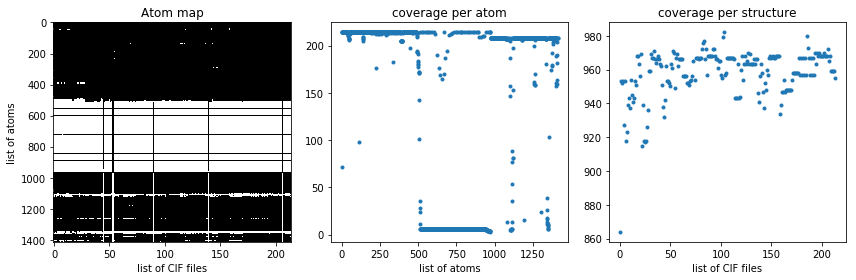

In [25]:
from PDBClean import pdbclean_viz as viz
viz.show_atommap(atommap)

In [67]:
atommap.shape
atommap_centered = (atommap.T - np.mean(atommap, axis=1)).T

In [68]:
from scipy import linalg
U, s, Vh = linalg.svd(atommap_centered)

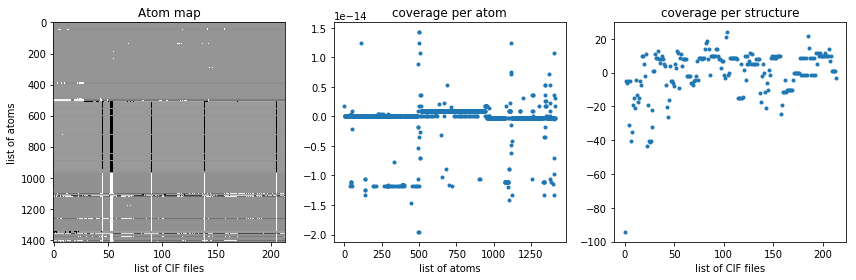

In [69]:
viz.show_atommap(atommap_centered)

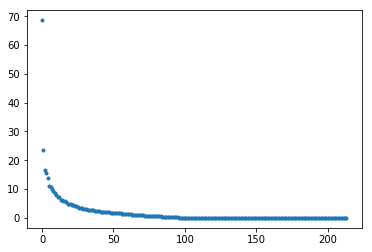

In [74]:
plt.plot(s, '.')

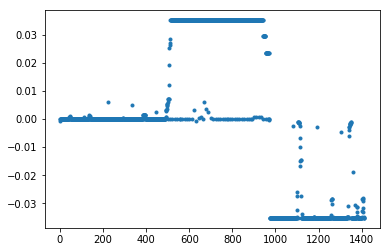

In [159]:
plt.plot(U[:,0], '.')

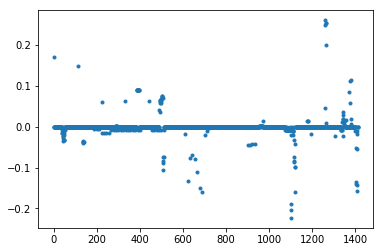

In [165]:
plt.plot(U[:,3], '.')

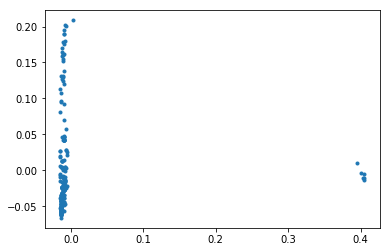

In [76]:
plt.plot(Vh[0,:], Vh[1,:], '.')

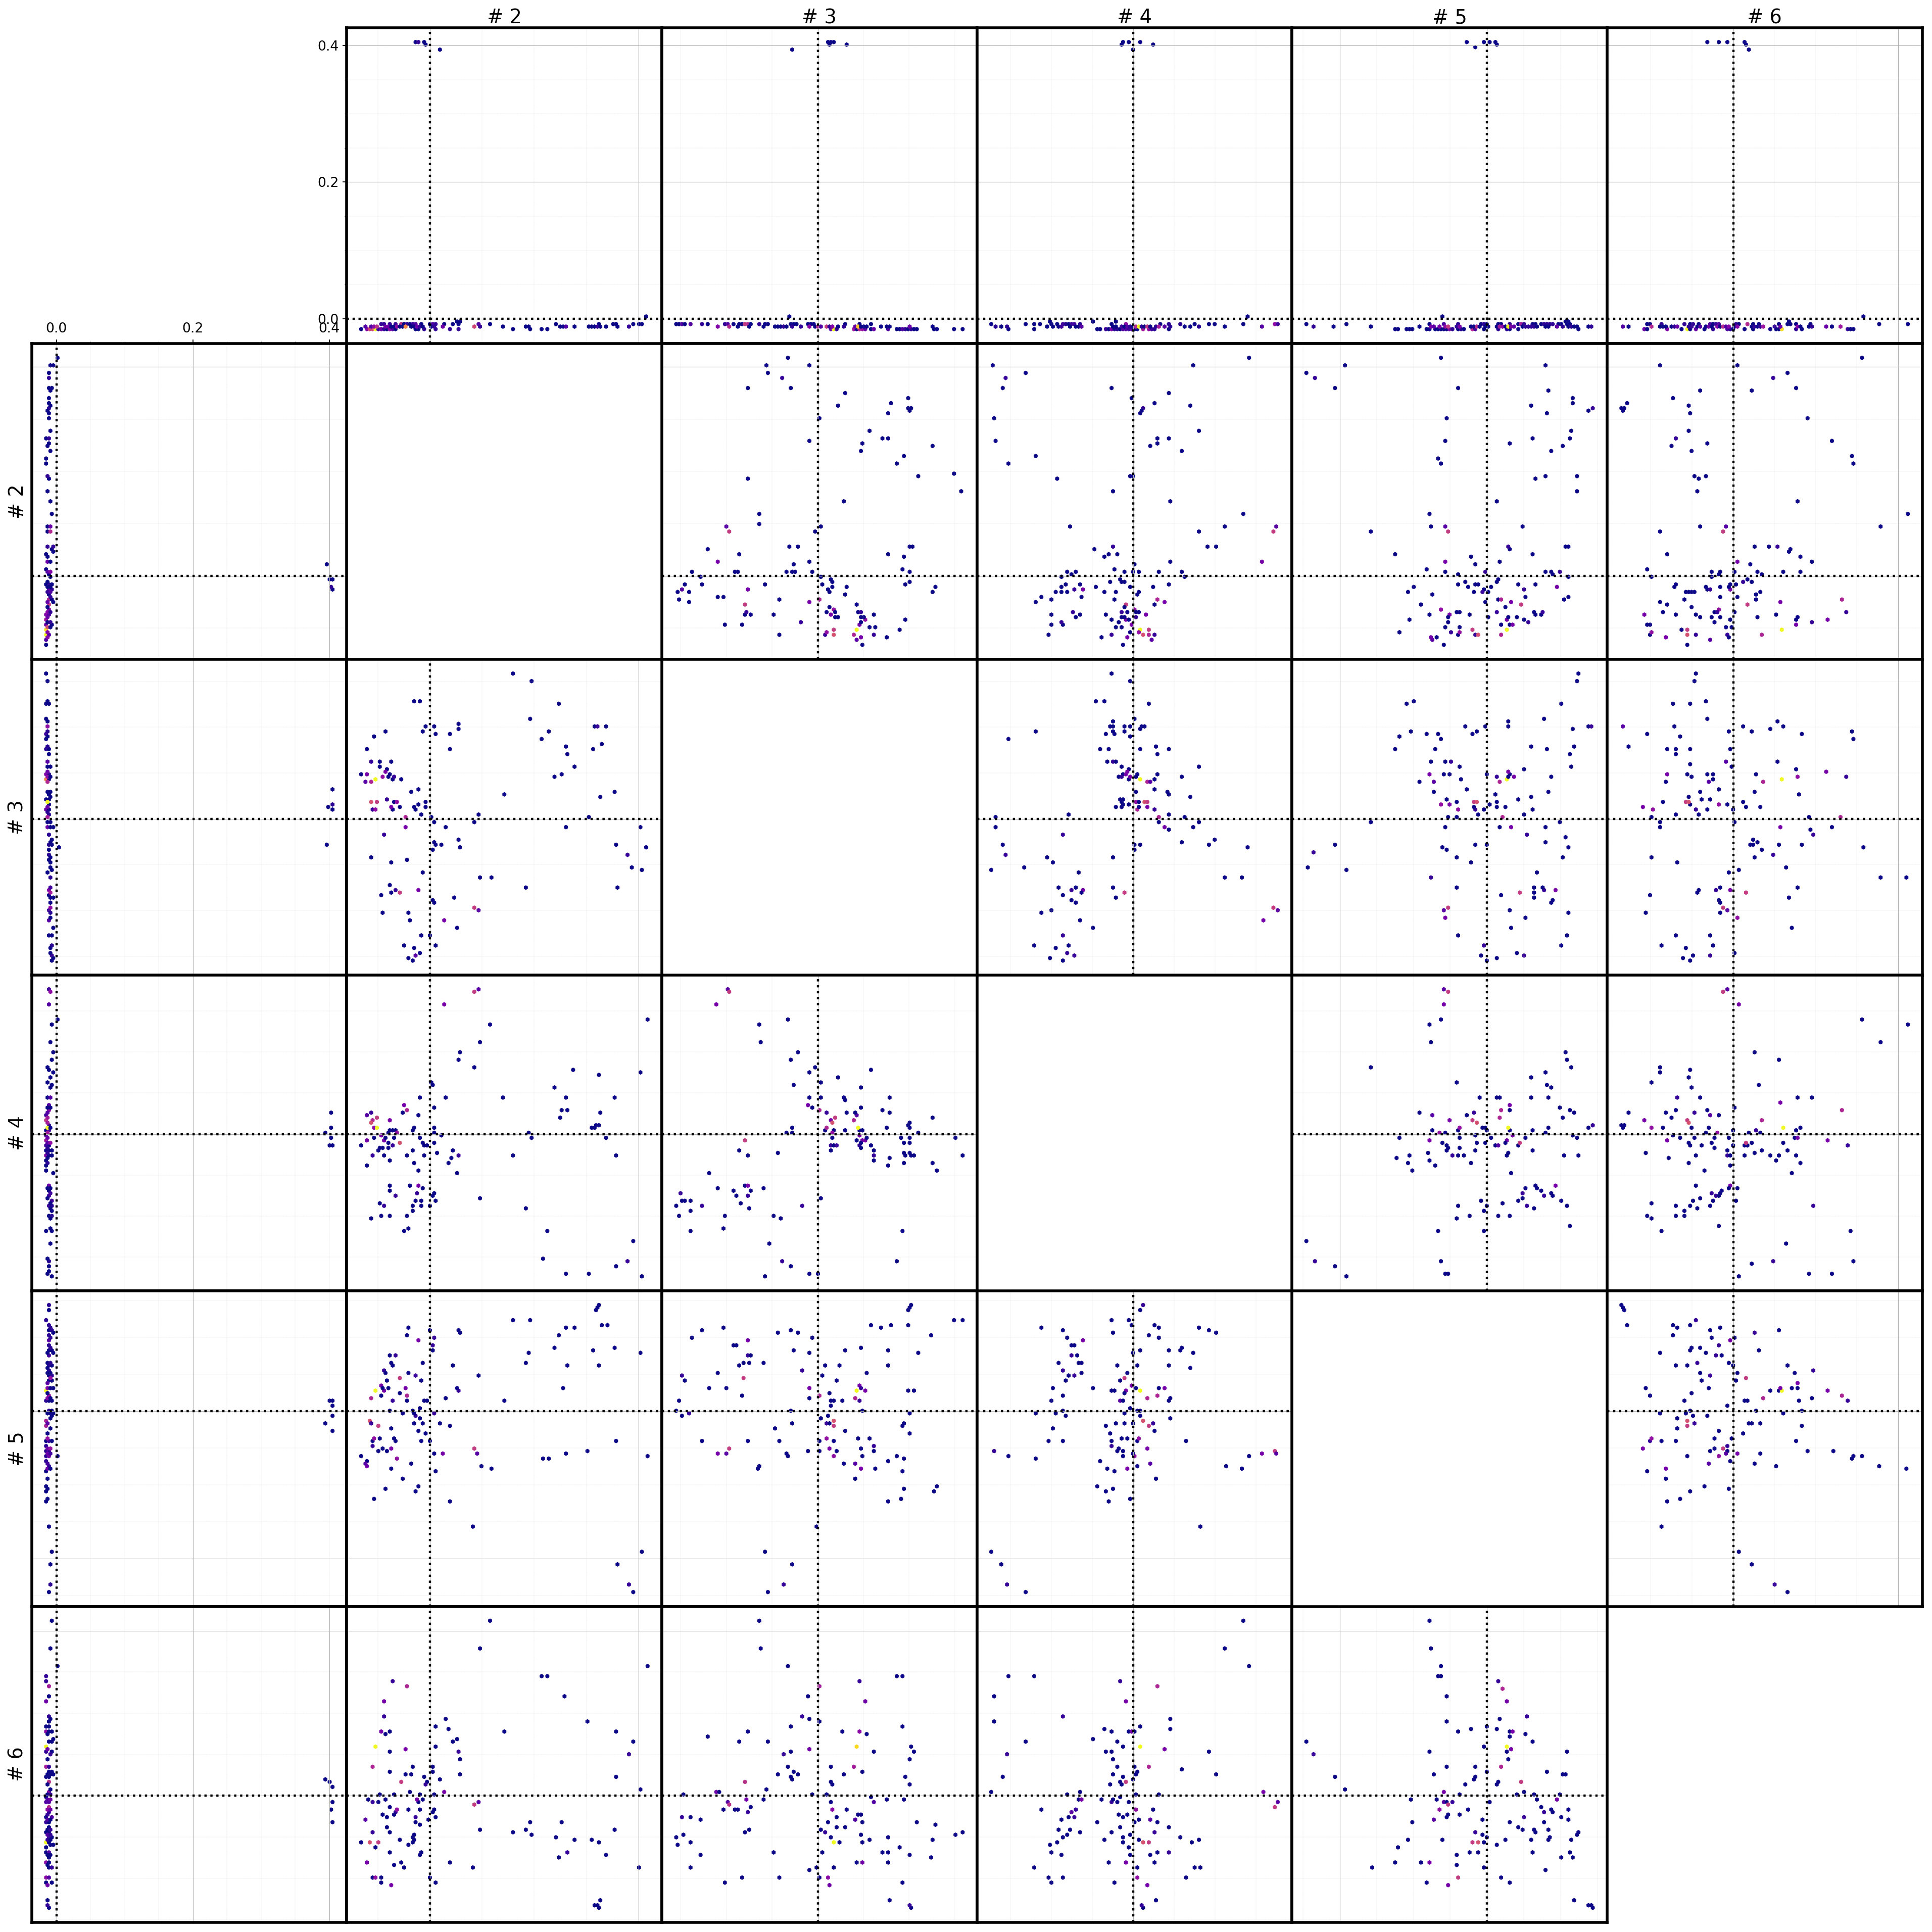

In [145]:
analysis.biplots(prj=Vh.T, prj2=Vh.T, n=6, nbins=100)

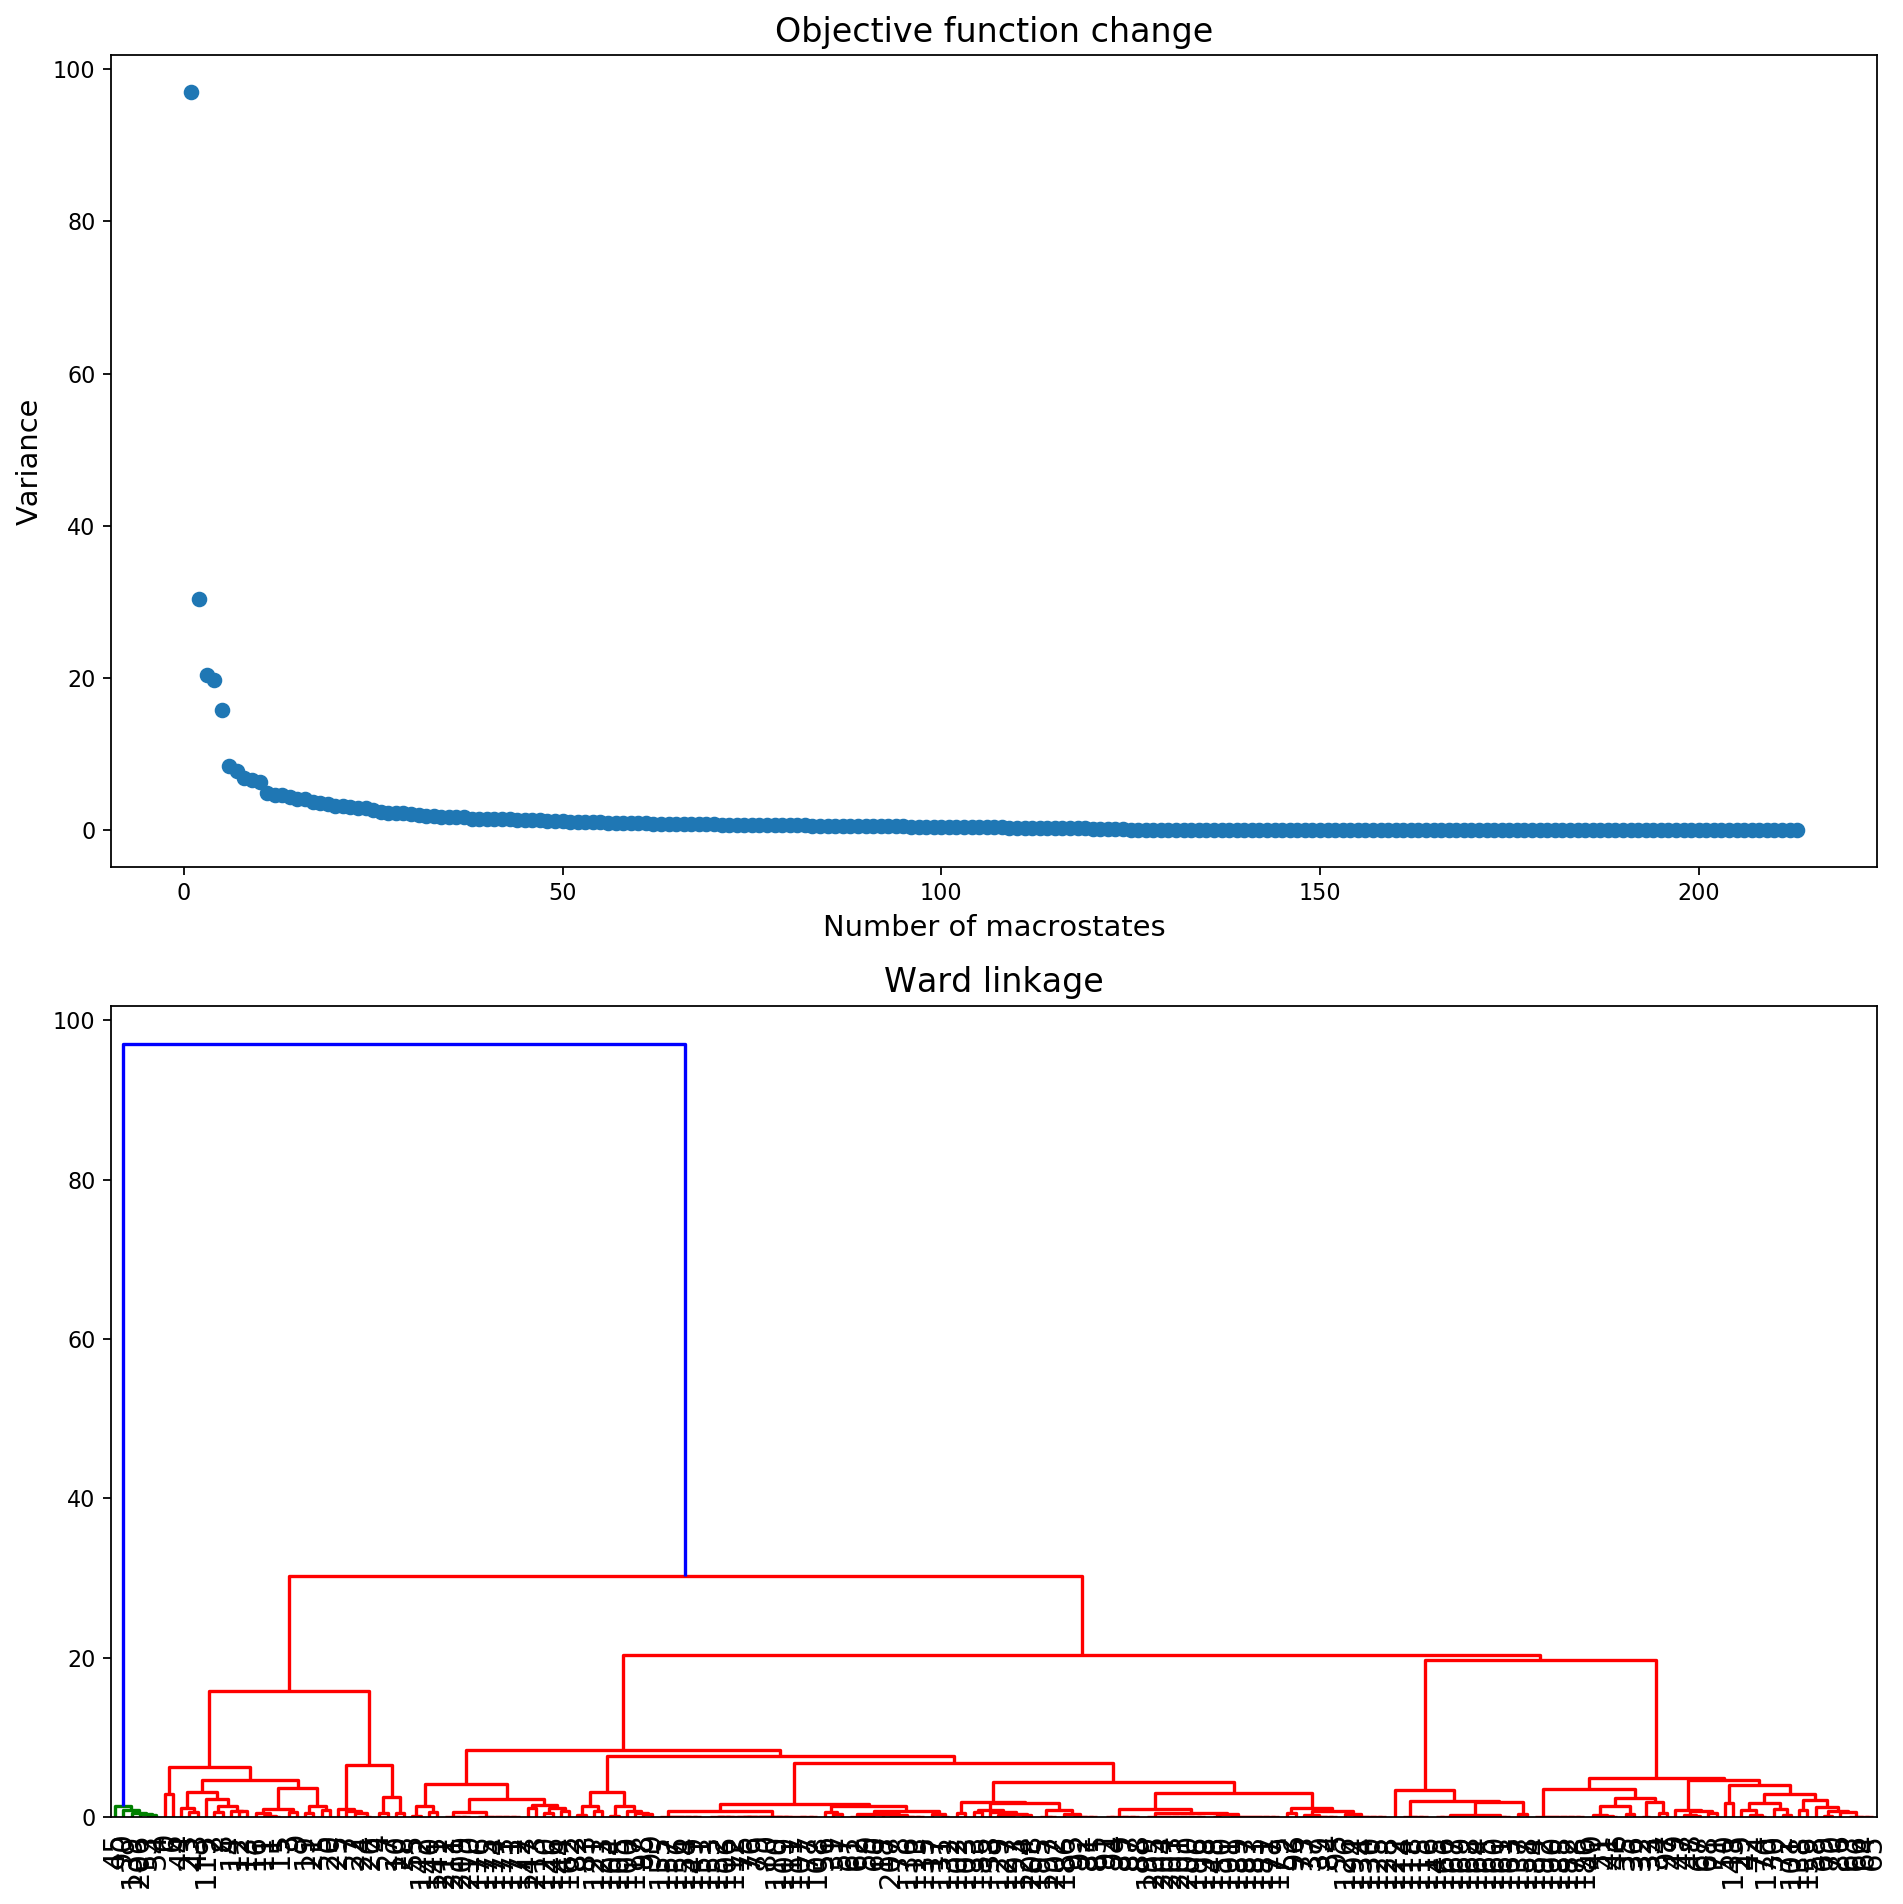

In [151]:
import scipy
from PDBClean import pdbclean_analysis as analysis
nmax = 5
atommap_approx = np.dot(U[:,0:nmax], np.dot(np.diag(s[0:nmax]), Vh[0:nmax,:]))
distance = scipy.spatial.distance.pdist(atommap_approx.T)
clusters = scipy.cluster.hierarchy.linkage(distance, method='ward')
analysis.plot_cluster(clusters, atommap_centered.T)

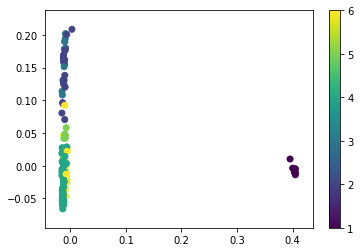

In [162]:
n_clusters = 6
assignment = analysis.get_assignment(clusters,n_clusters)
plt.scatter(Vh[0,:], Vh[1,:], c=assignment)
plt.colorbar()

In [163]:
#from sklearn.cluster import KMeans
#kmeans = KMeans(n_clusters=3, random_state=0).fit(Vh[0:5,:].T)

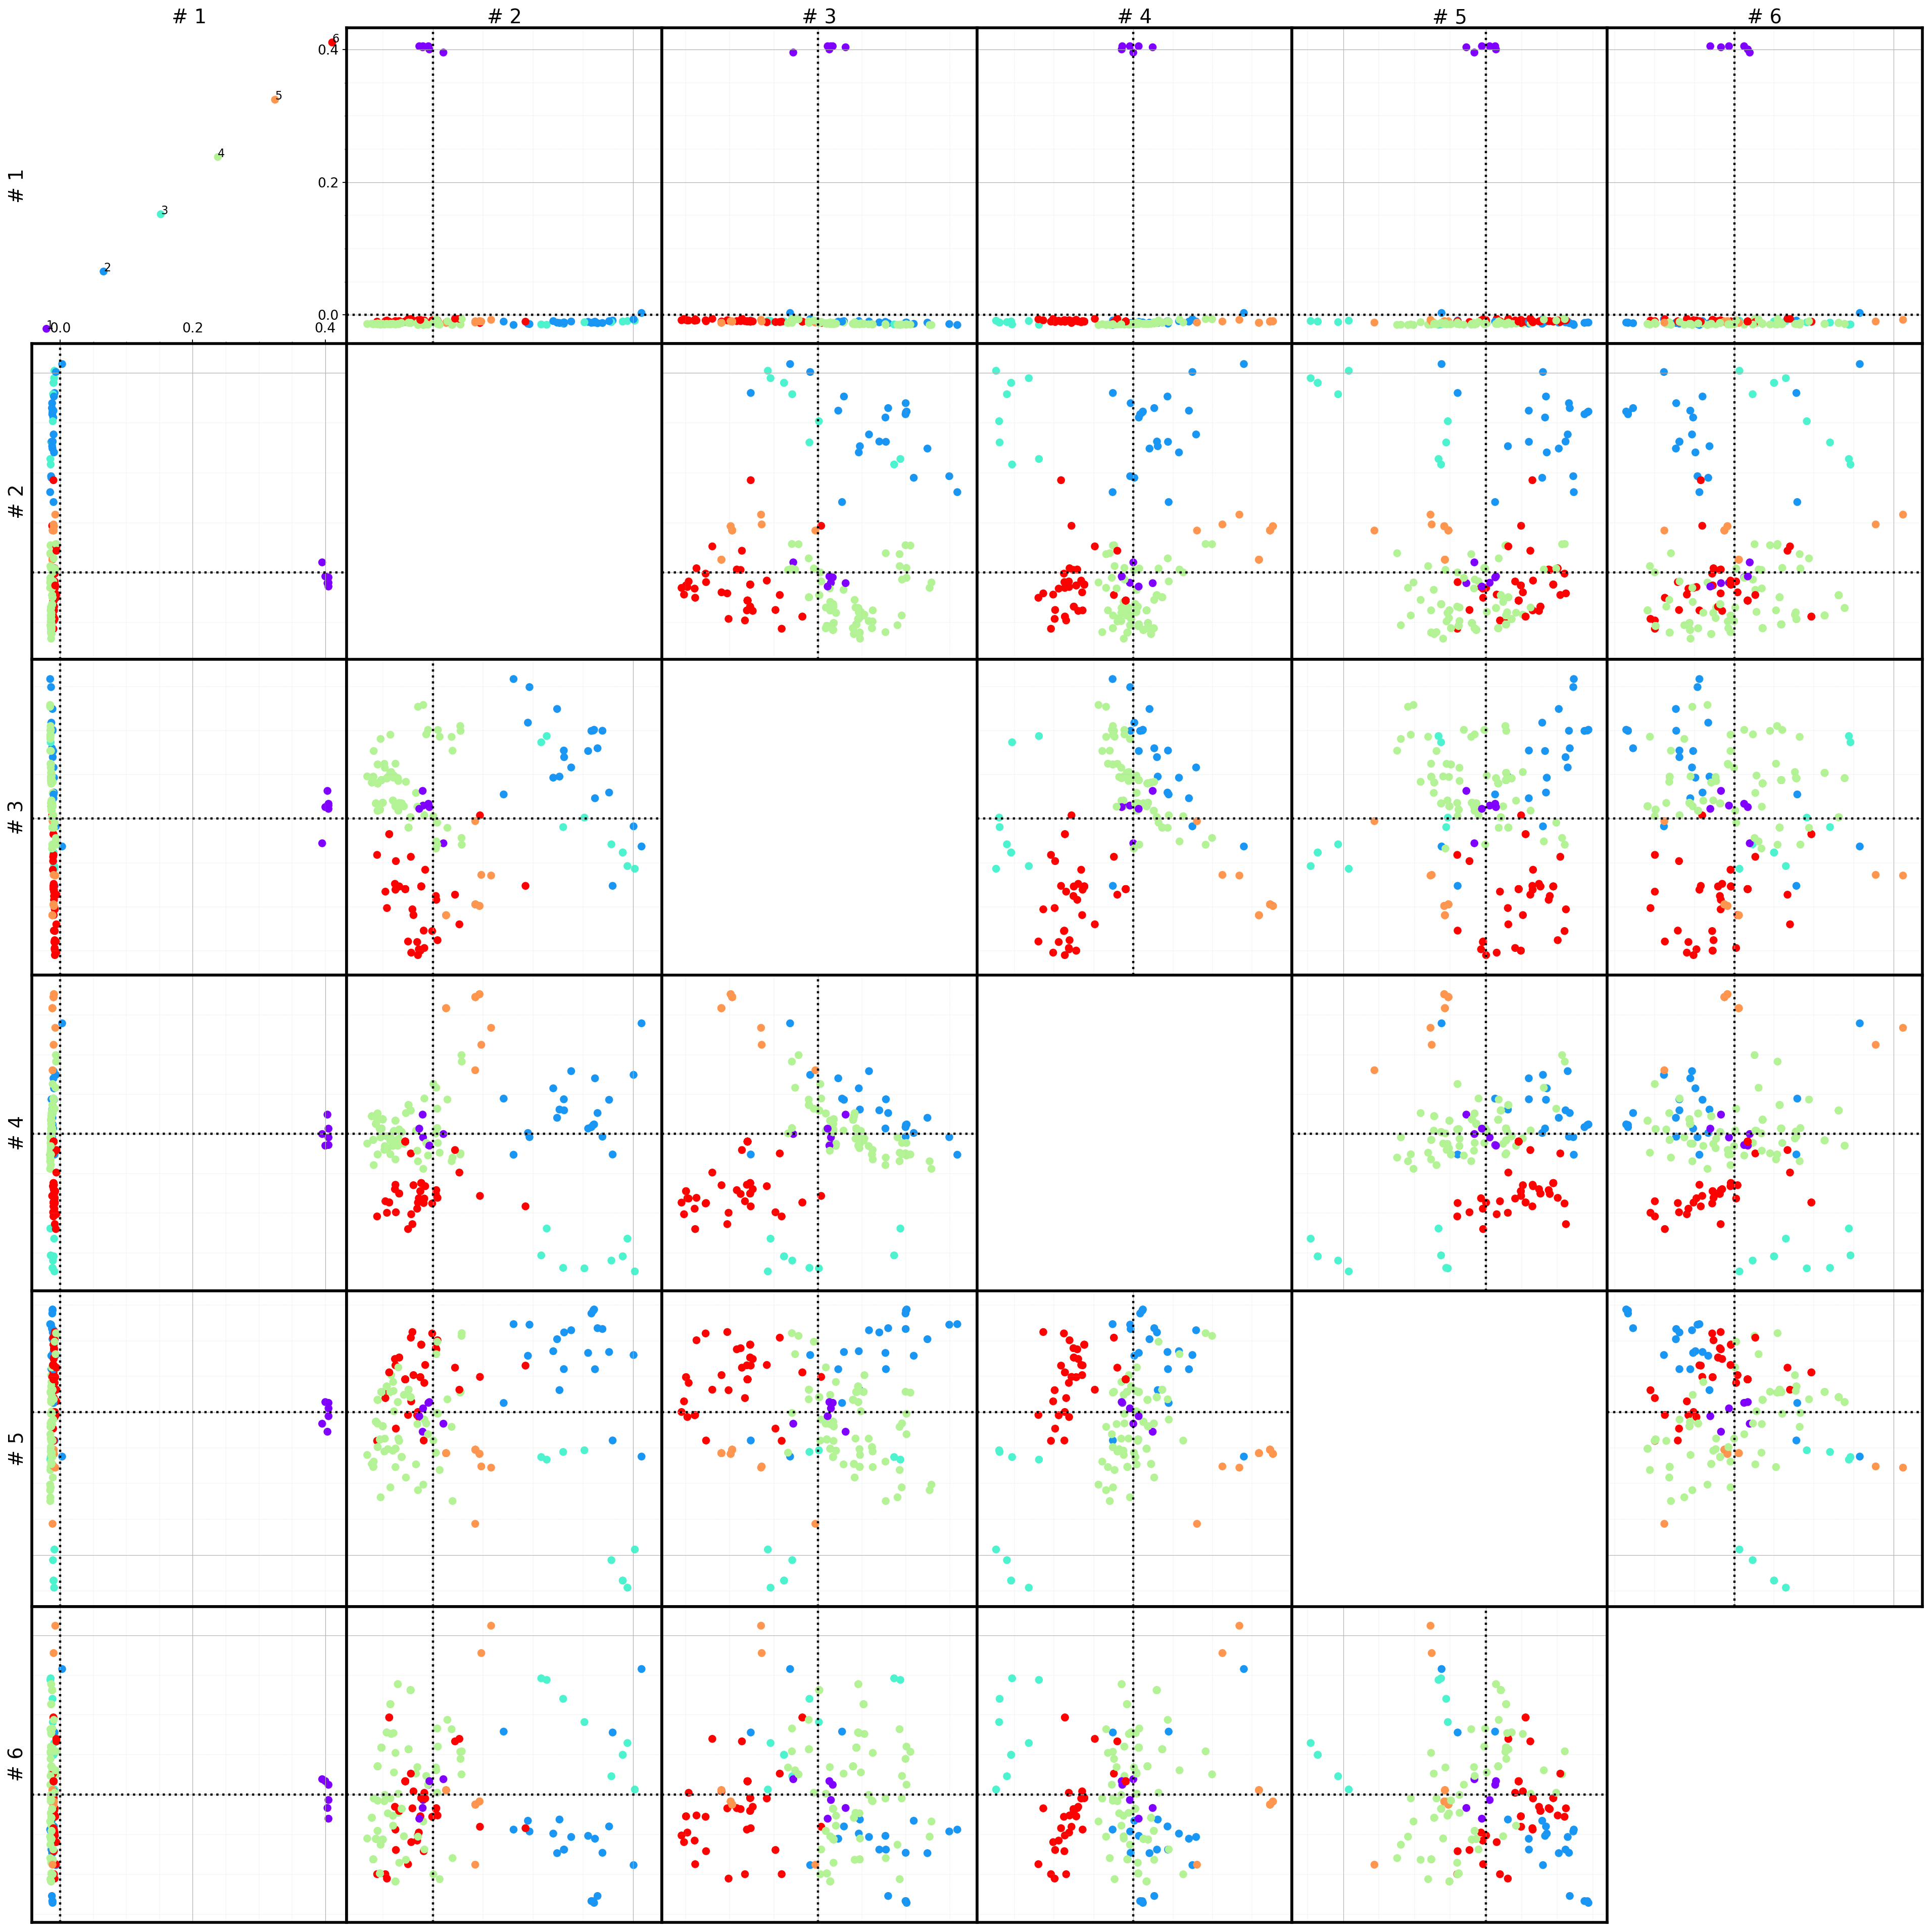

In [164]:
analysis.biplots(prj=Vh.T, prj2=Vh.T, n=6, nbins=100, c=assignment)

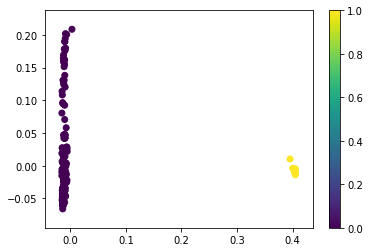

In [147]:
plt.scatter(Vh[0,:], Vh[1,:], c=kmeans.labels_)
plt.colorbar()

In [115]:
assignment = kmeans.labels_
assignment.shape
assignment
#sample_mask = np.where(assignment==0, True, False)
#sample_mask

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

Building atom map from keychain.
Building atom map from keychain.


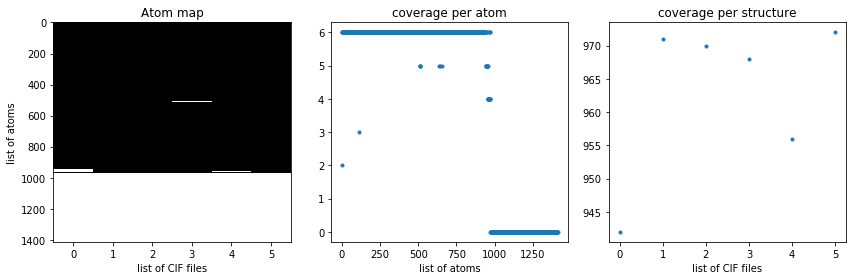

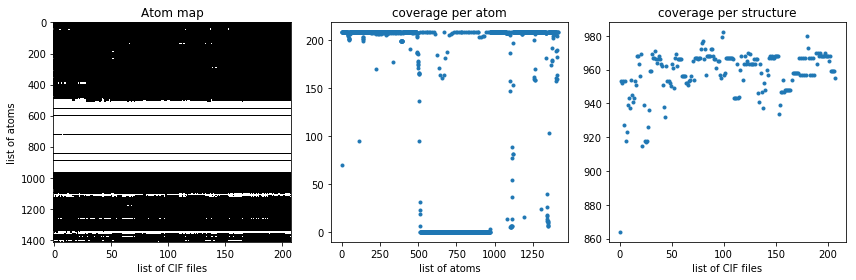

In [109]:
import numpy.ma as ma
from PDBClean import pdbclean_homogenutils as homogen
for i in np.arange(2):
    sample_mask    = np.where(assignment==i, True, False)
    sample_array   = np.array(input_list)
    sample_reduced = ma.masked_array(sample_array, mask=sample_mask).compressed()
    #keychain_reduced = homogen.reduce_feature_keep_samples(keychain, sample_reduced, verbose=False, show=False)
    map_reduced = cif.keychain_to_atommap(keychain, sample_reduced.tolist(), verbose=True)
    viz.show_atommap(map_reduced)

Building atom map from keychain.


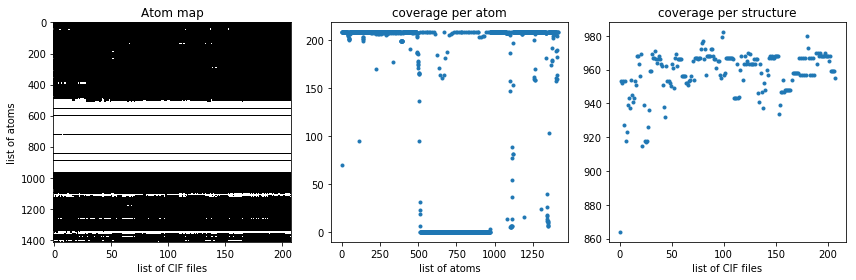

In [116]:
sample_mask    = np.where(assignment==0, False, True)
sample_array   = np.array(input_list)
sample_reduced = ma.masked_array(sample_array, mask=sample_mask).compressed()
#keychain_reduced = homogen.reduce_feature_keep_samples(keychain, sample_reduced, verbose=False, show=False)
map_reduced = cif.keychain_to_atommap(keychain, sample_reduced.tolist(), verbose=True)
viz.show_atommap(map_reduced)
c1_atommap_centered = (map_reduced.T - np.mean(map_reduced, axis=1)).T
c1_U, c1_s, c1_Vh = linalg.svd(c1_atommap_centered)

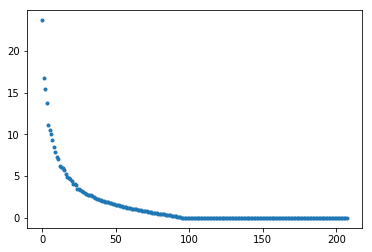

In [118]:
plt.plot(c1_s, '.')

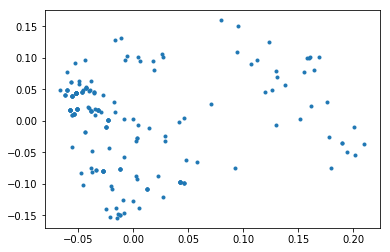

In [122]:
plt.plot(c1_Vh[0,:], c1_Vh[1,:], '.')

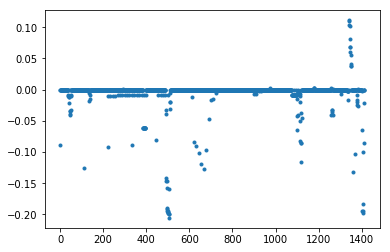

In [125]:
plt.plot(c1_U[:,0], '.')

In [134]:
import scipy
c1_atommap_approx = np.dot(c1_U[:,0:5], np.dot(np.diag(c1_s[0:5]), c1_Vh[0:5,:]))
distance = scipy.spatial.distance.pdist(c1_atommap_approx.T)
clusters = scipy.cluster.hierarchy.linkage(distance, method='ward')

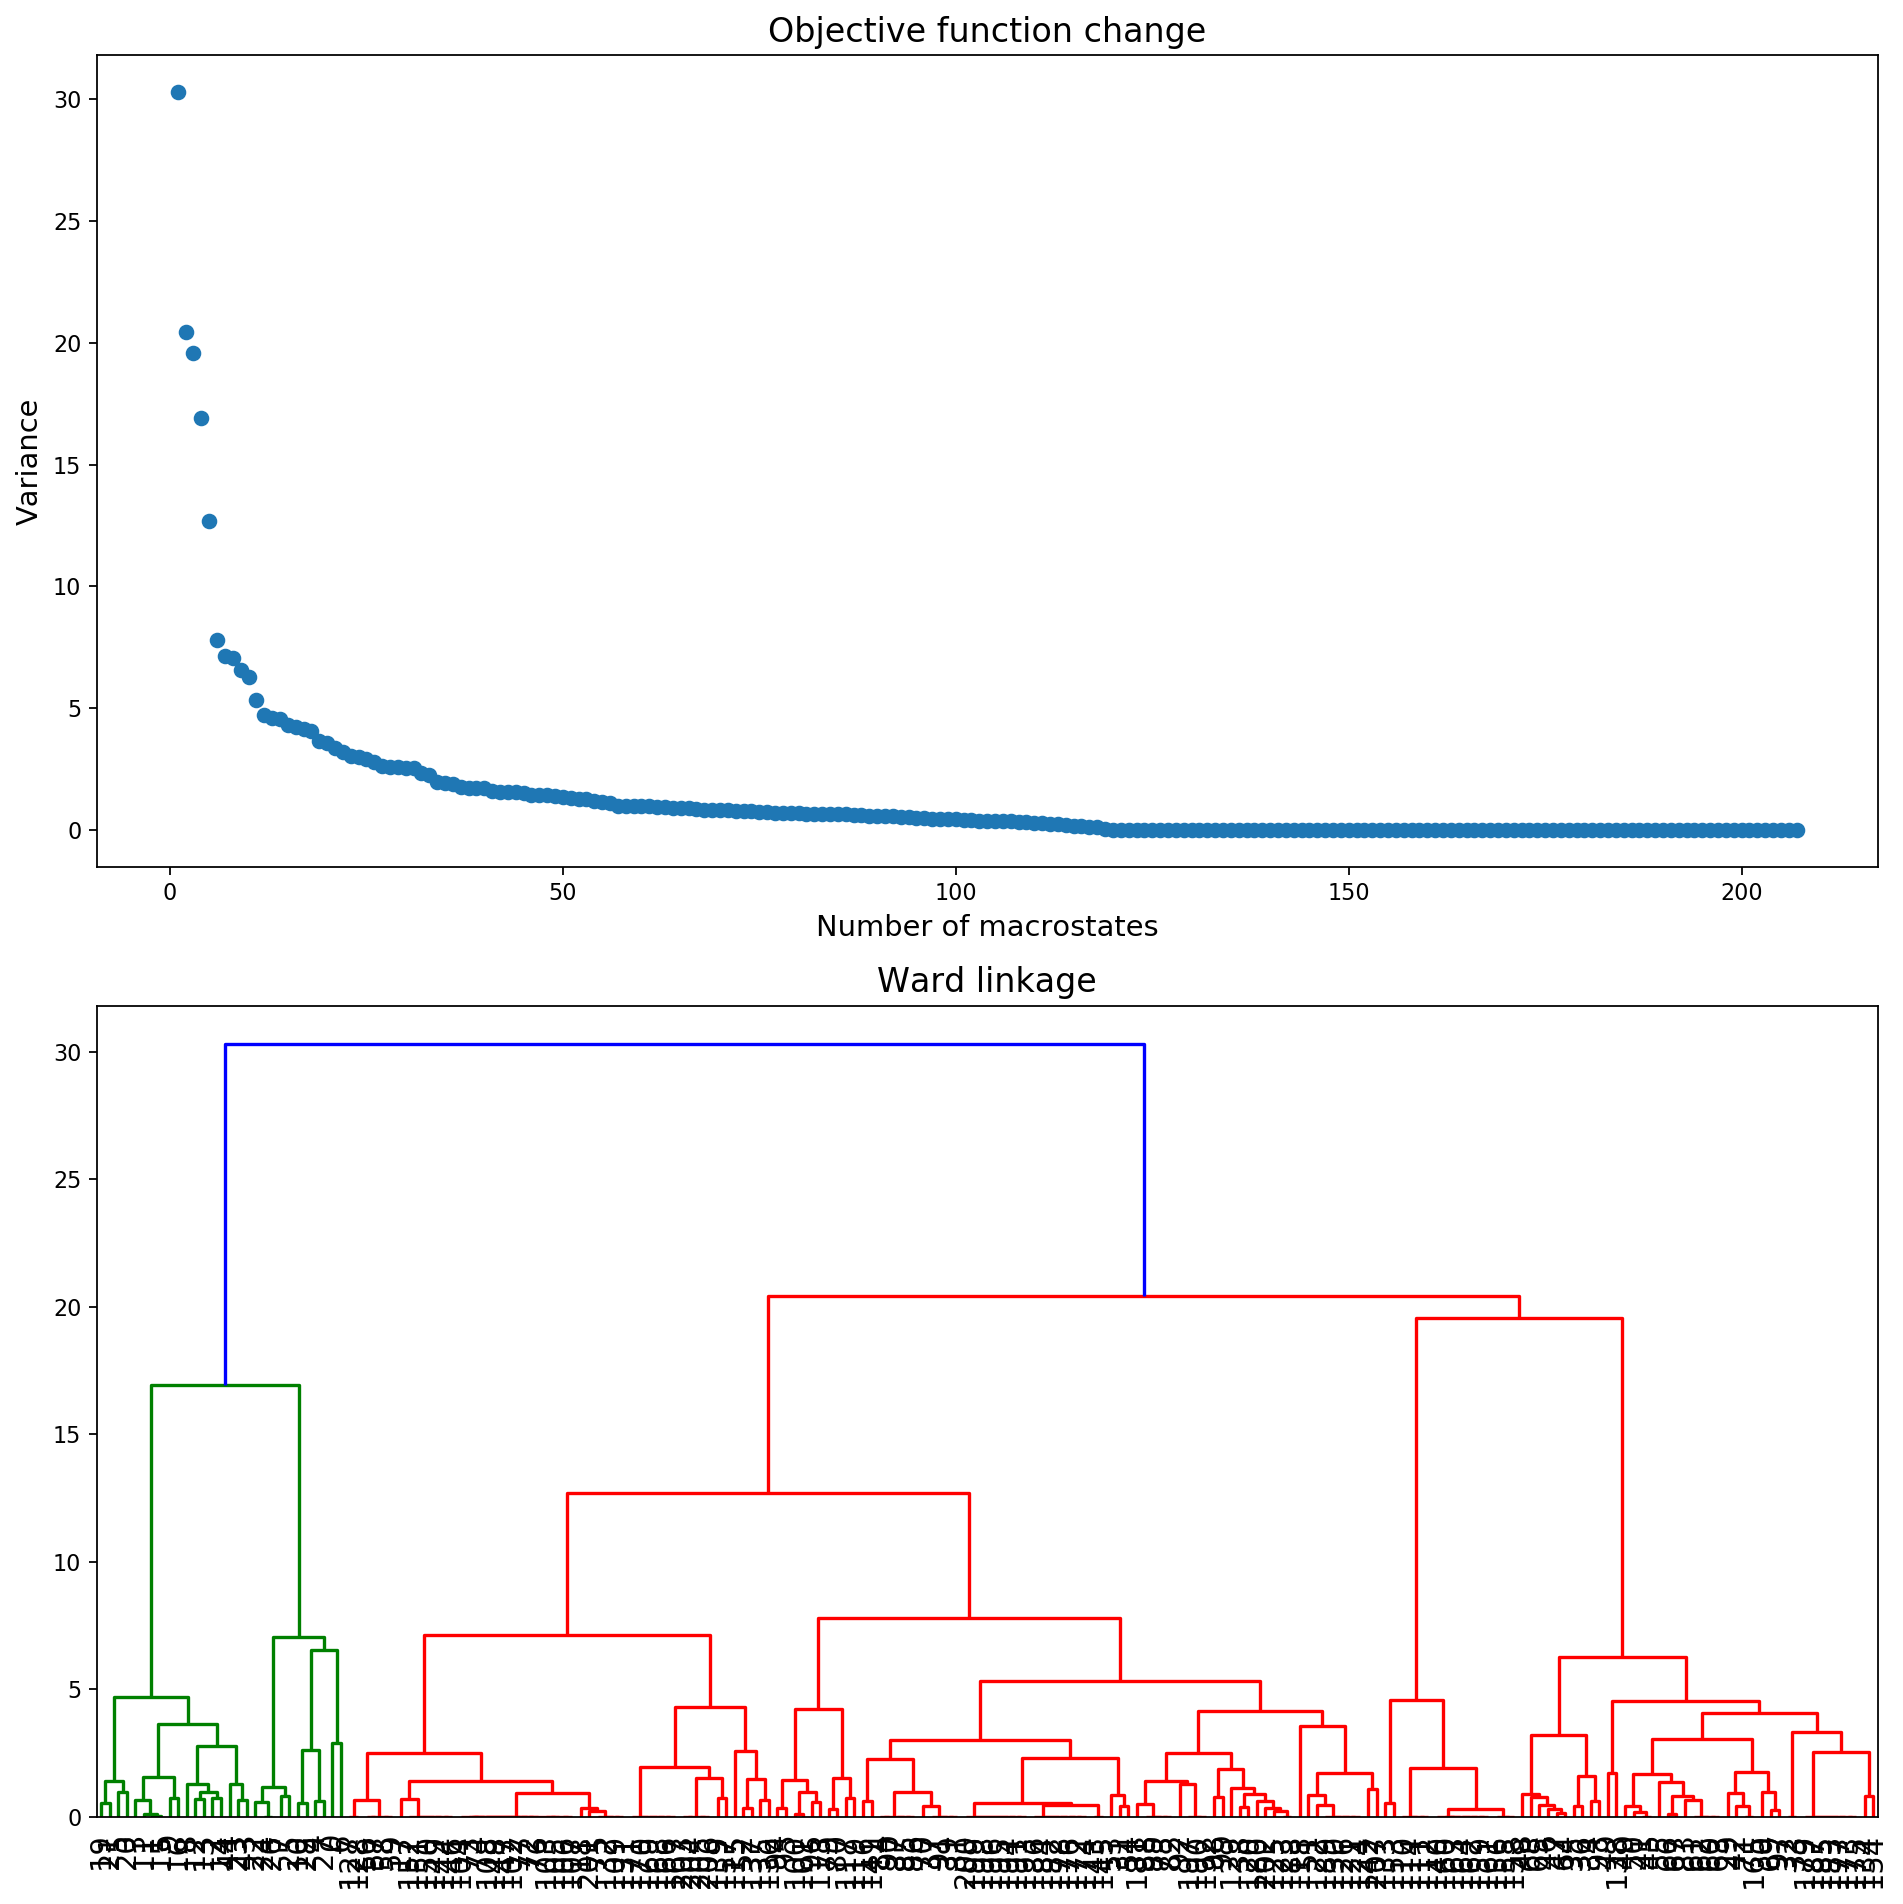

In [135]:
from PDBClean import pdbclean_analysis as analysis
analysis.plot_cluster(clusters, c1_atommap_centered.T)

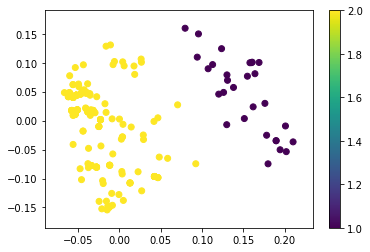

In [136]:
n_clusters = 2
c1_assignment = analysis.get_assignment(clusters,n_clusters)
plt.scatter(c1_Vh[0,:], c1_Vh[1,:], c=c1_assignment)
plt.colorbar()